In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
# ML
import torch
import torch.nn as nn
from sklearn import datasets

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.patches import Circle, Wedge, Polygon

# Math
import math
from math import cos, sin
import numpy as np
import random

## 1 Neural Network

In [3]:
def train(x, y, model, crit):
    idx = 0
    for epoch in range(1000):
        if (epoch % 200) == 0:
            idx = idx + 1
            plt.title("Epoch: " + str(epoch))
            plot_regions(x,y,model)

        elif epoch == 999:
            idx = epoch / 200 + 1
            plt.title("Epoch: " + str(epoch))
            plot_regions(x,y,model)
                        
        y_pred = model(x)
        
        loss = crit(y_pred,y)
        # print('epoch: ', epoch,' loss: ', loss.item())
        optimizer.zero_grad()
        loss.backward()  # back pass
        optimizer.step() # update params
    #plt.show()
    return loss

In [4]:
def pred(model,x):
    return model(torch.FloatTensor(x)).tolist()

def rand_points():
    x_points = np.linspace(0,10,200)
    y_points = np.linspace(0,10,200)
    points = [[x,y] for x in x_points for y in y_points]
    return points

def train_vals(x):
    return ([z[0] for z in x.tolist()],[z[1] for z in x.tolist()])

def plot_regions(x,y,model, idx=-1):
    x_train,y_train = train_vals(x)
    points = rand_points()
    x_map = [x[0] for x in points]
    y_map = [x[1] for x in points]
    preds = pred(model,points)
    
    
    #get colors
    c1 = ['g','b']
    c2 = ['#E2E79F','#FF90FF']
    
    train_map = [c1[int(x[0])] for x in y.tolist()]
    cmap = [c2[0] if x[0] < 0.5 else c2[1] for x in preds]
    #plot points
    print(len(x_map))
    plt.scatter(x_map,y_map,color=cmap)
    plt.scatter(x_train,y_train,color=train_map,marker='o')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    #show classification regions
    if idx == -1:
        plt.show()
    else:
        plt.subplot(5,2,idx)

Underparameterize
40000


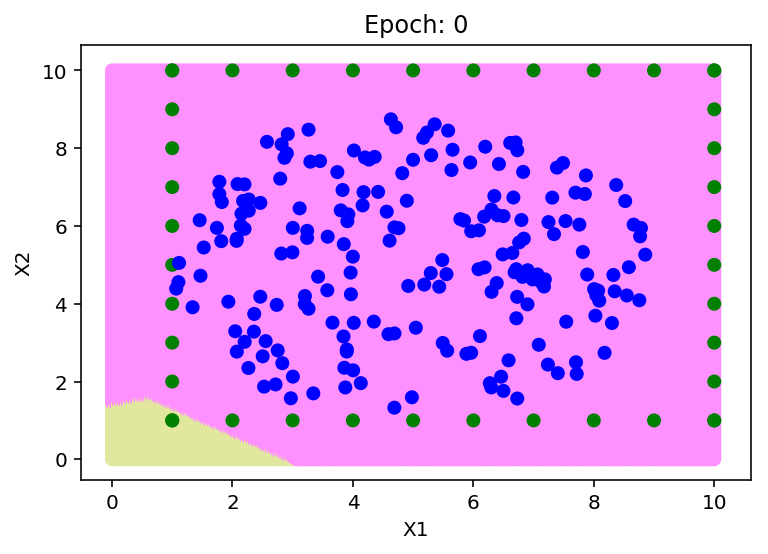

40000


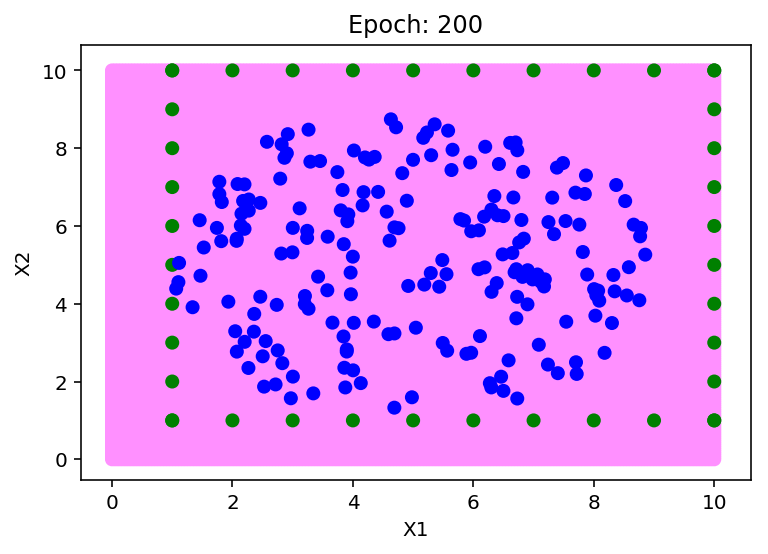

40000


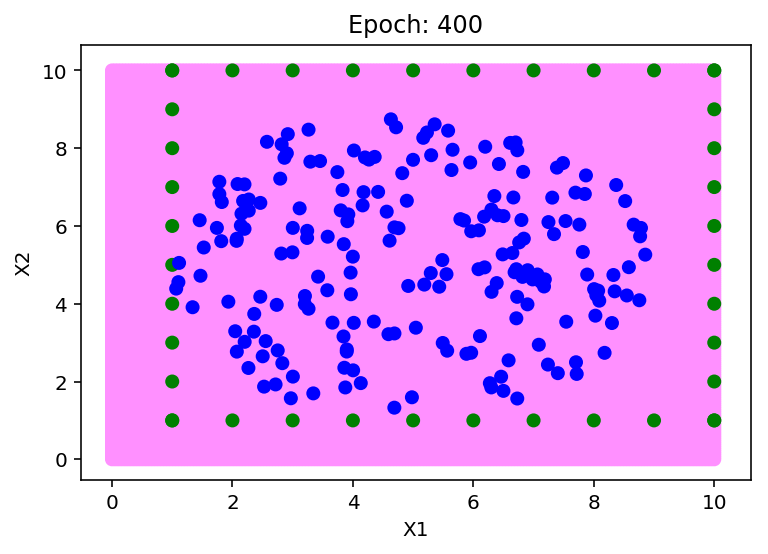

40000


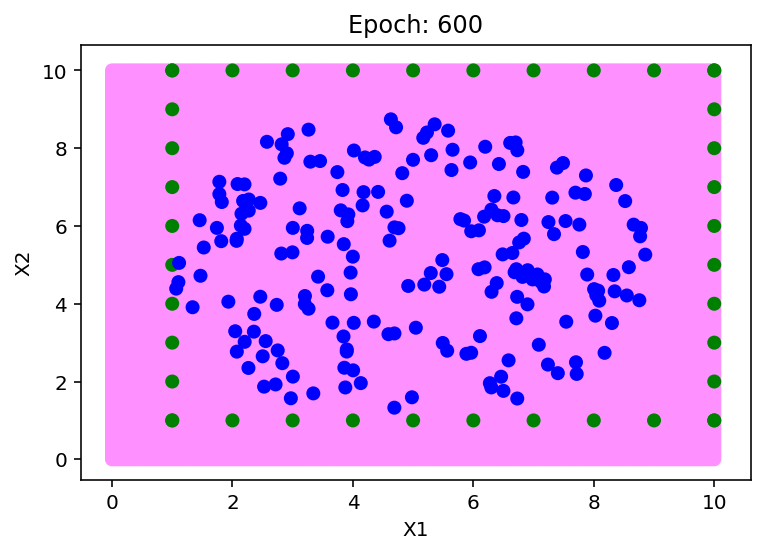

40000


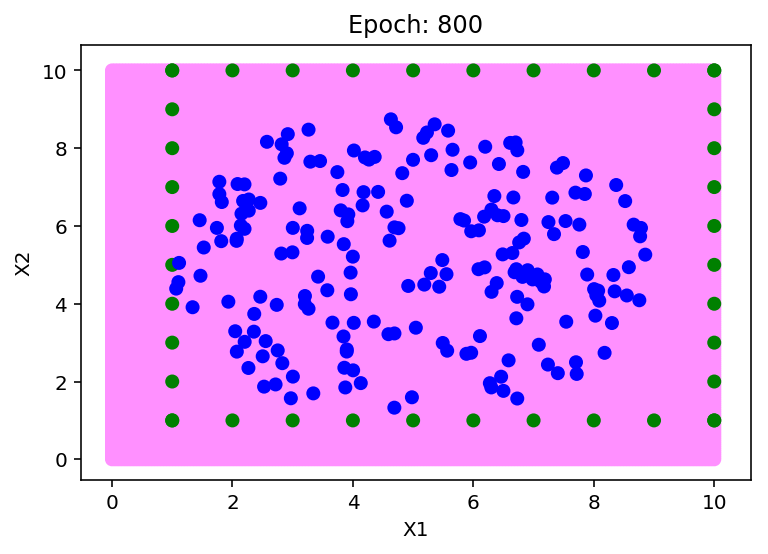

40000


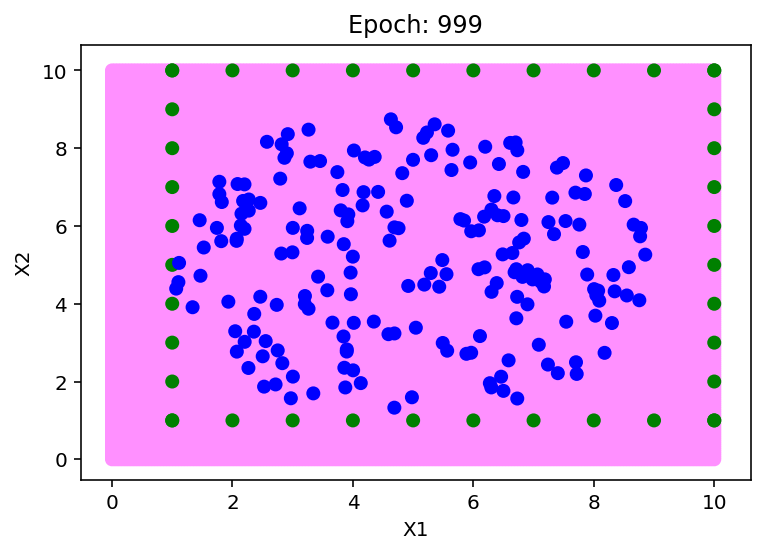

40000


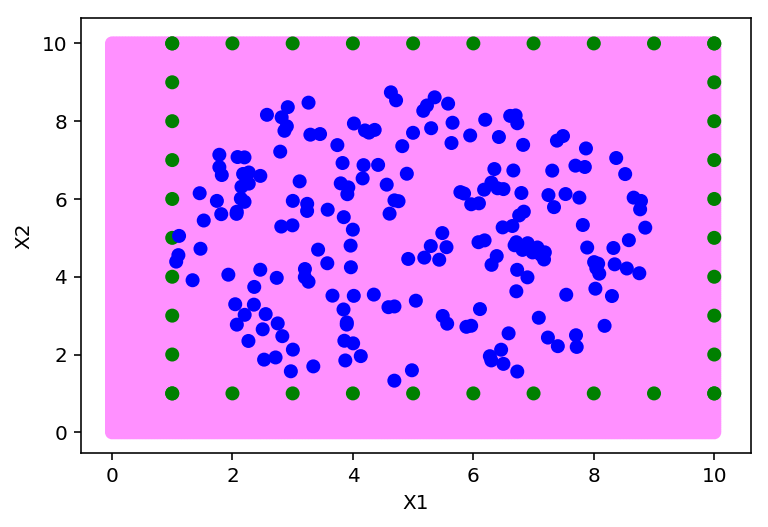

Overparameterize
40000


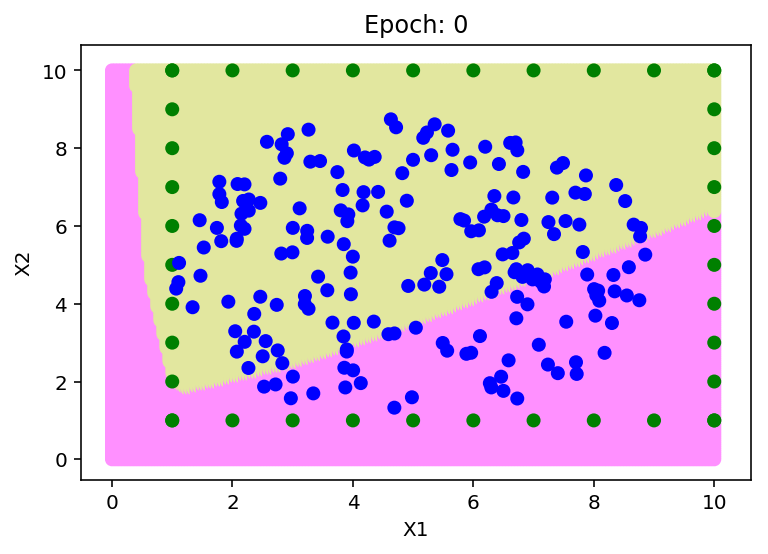

40000


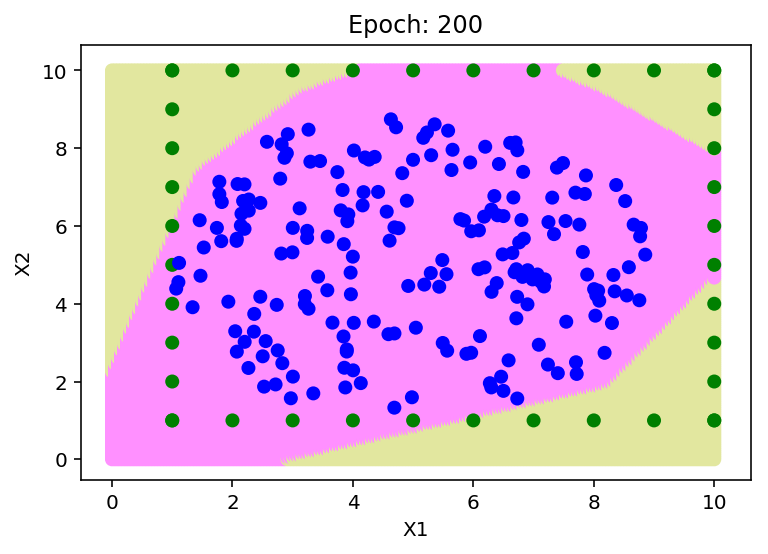

40000


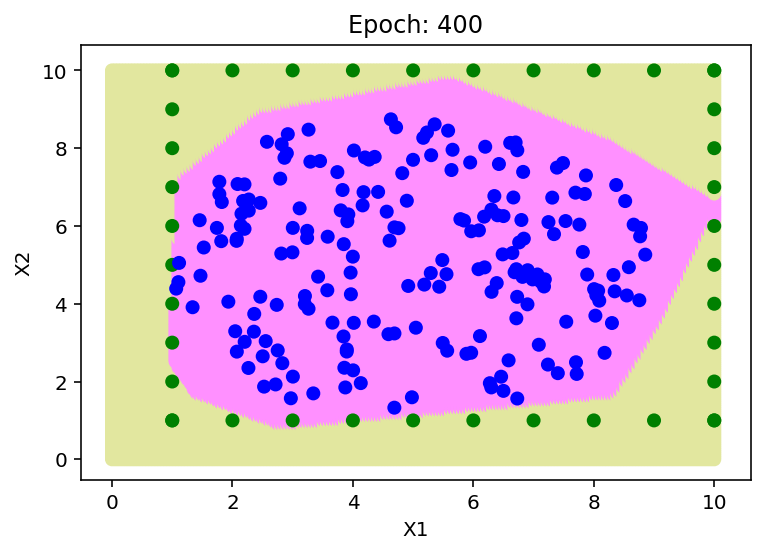

40000


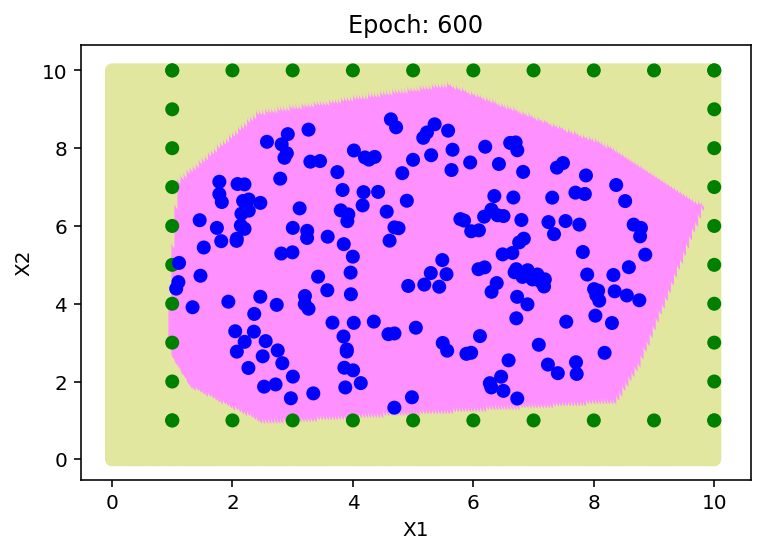

40000


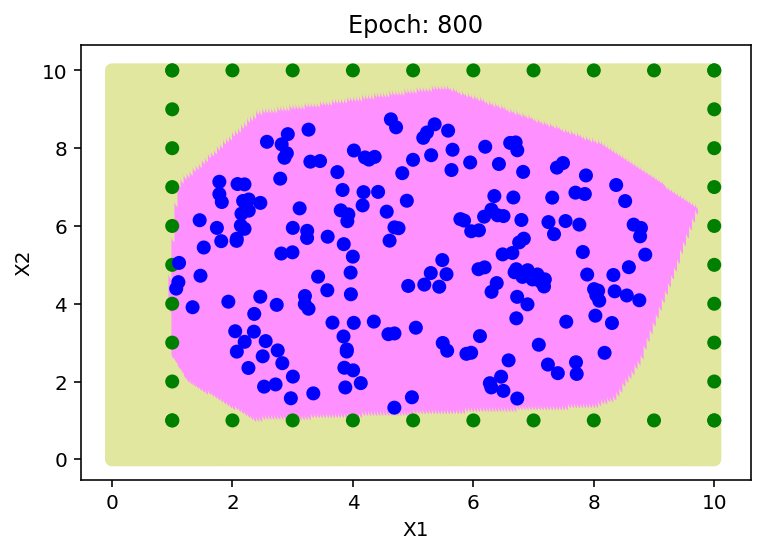

40000


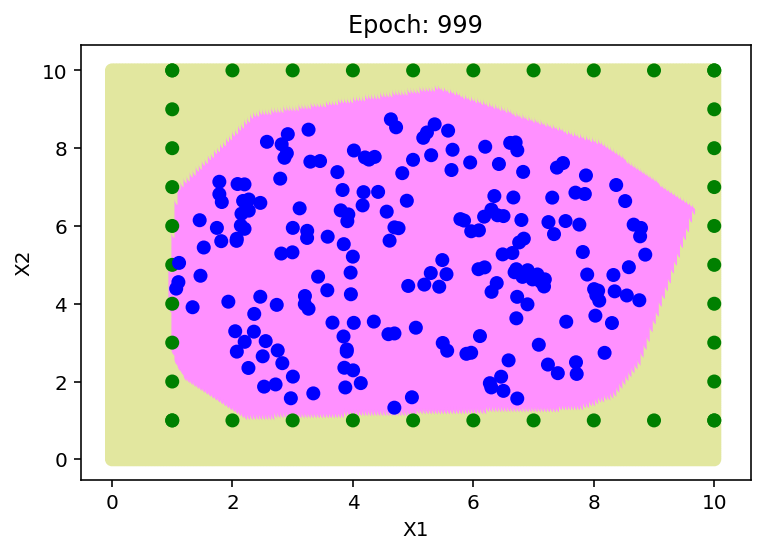

40000


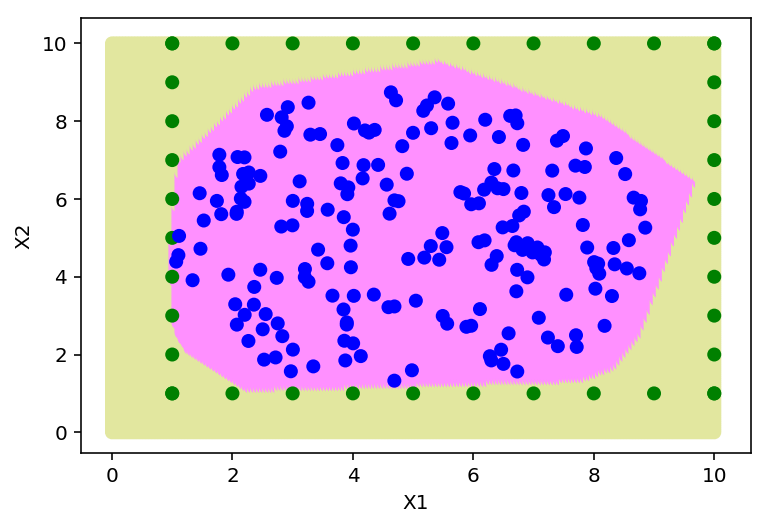

In [5]:
d = 2

#get data for new model
x1 = []
for z in range(1,11):
    x1.append([z,1])
    x1.append((1,z))
    x1.append((10,z))
    x1.append((z,10))
y1 = [[0] for x in range(len(x1))]
x2 = []
y2 = []
for z in range(200):
    r = 4 * (random.random() ** 0.5)
    theta = random.random() * 2 * 3.14159
    x = 5 + r * cos(theta)
    y = 5 + r * sin(theta)
    x2.append([x,y])
    y2.append([1])

x = x1 + x2
y = y1 + y2

x = torch.FloatTensor(x)
y = torch.FloatTensor(y)



print("Underparameterize")
H = 3
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)



print("Overparameterize")
H = 20
model = nn.Sequential(nn.Linear(d,H), # Shape: [2, 20]
                     nn.ReLU(),       # Shape: [20, 20]
                     nn.Linear(H,1),  # Shape: [20, 1]
                      nn.Sigmoid())   # Shape: [1, 1]

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    
train(x,y,model,crit)
plot_regions(x,y,model)
    

Underparameterize
40000


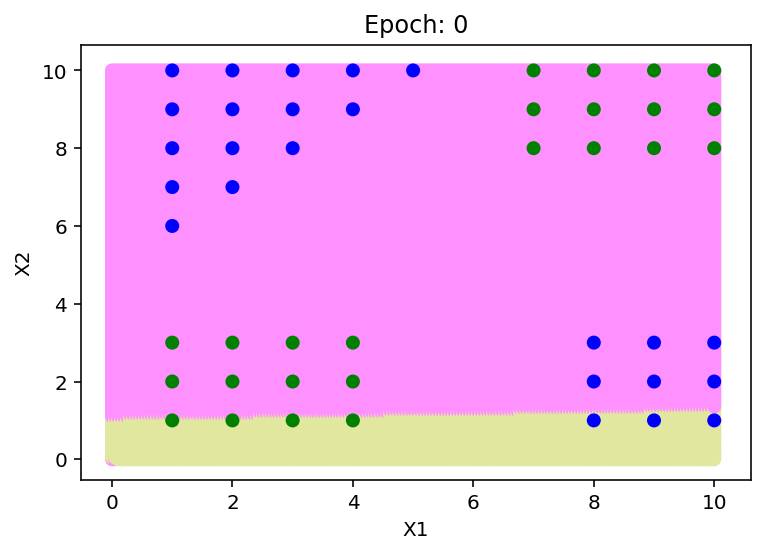

40000


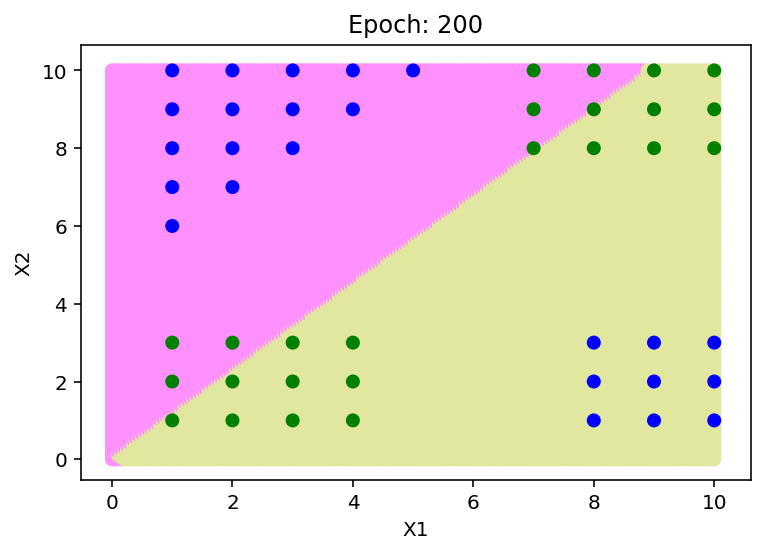

40000


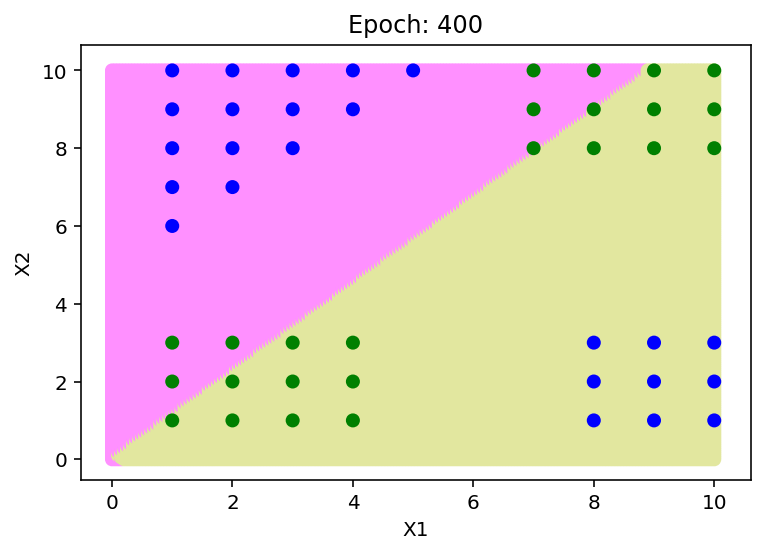

40000


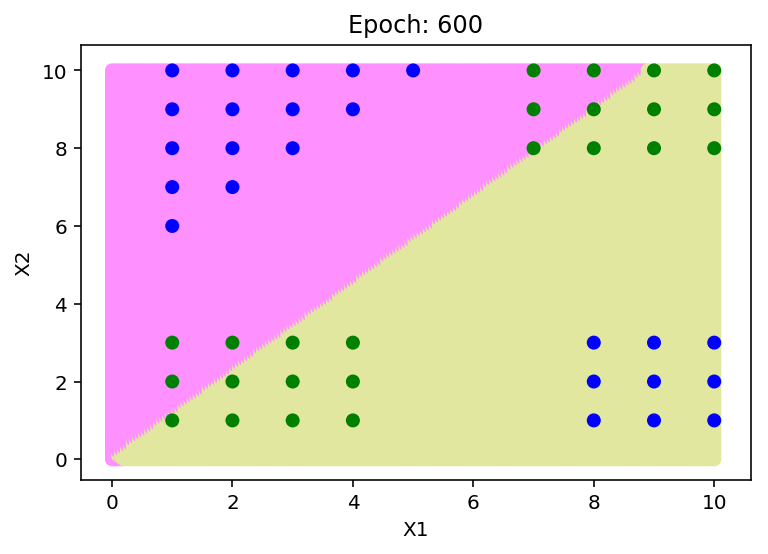

40000


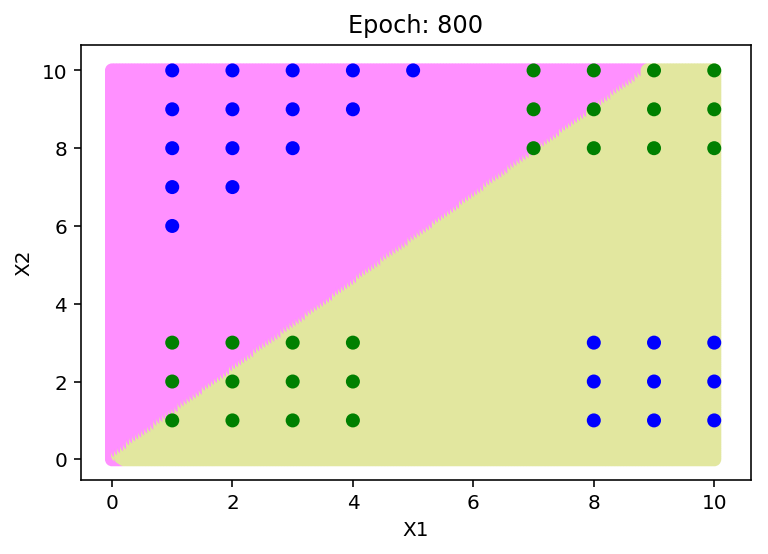

40000


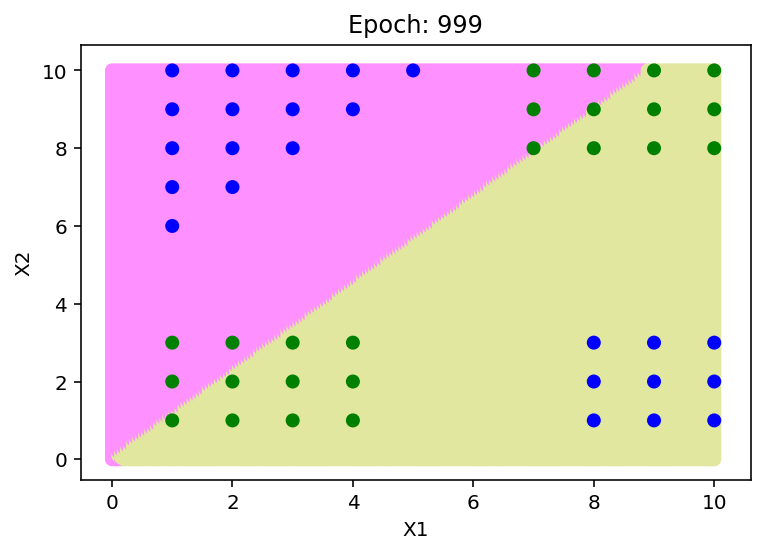

40000


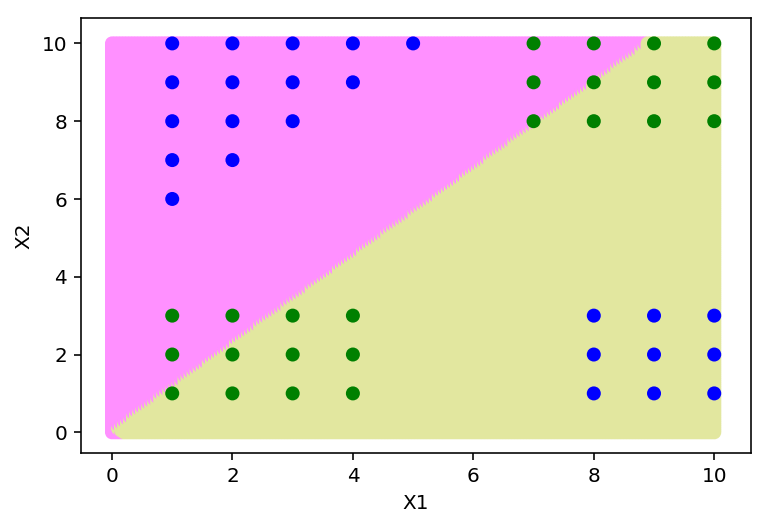

Overparameterize
40000


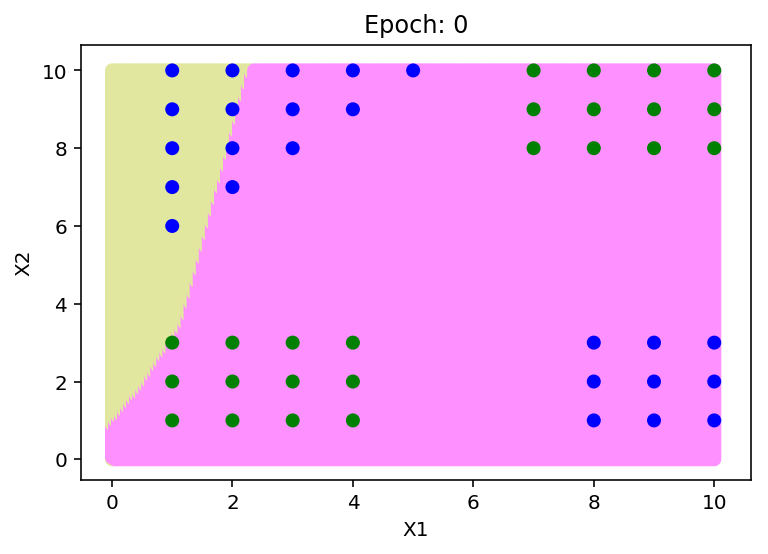

40000


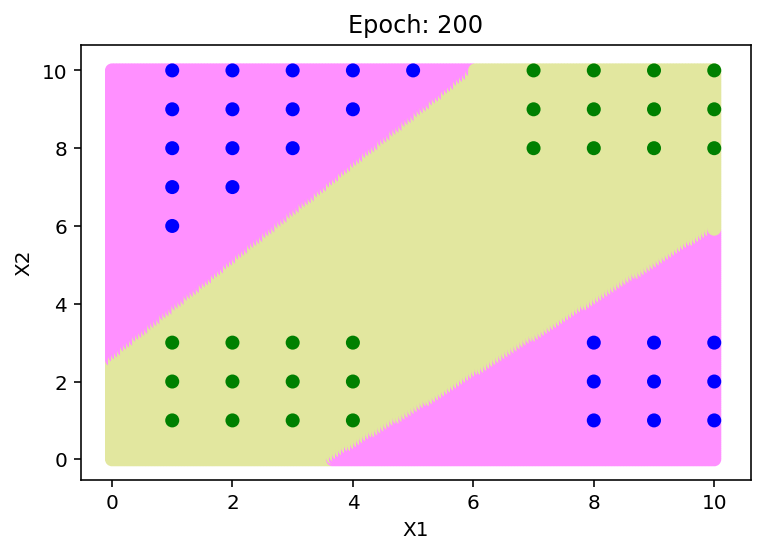

40000


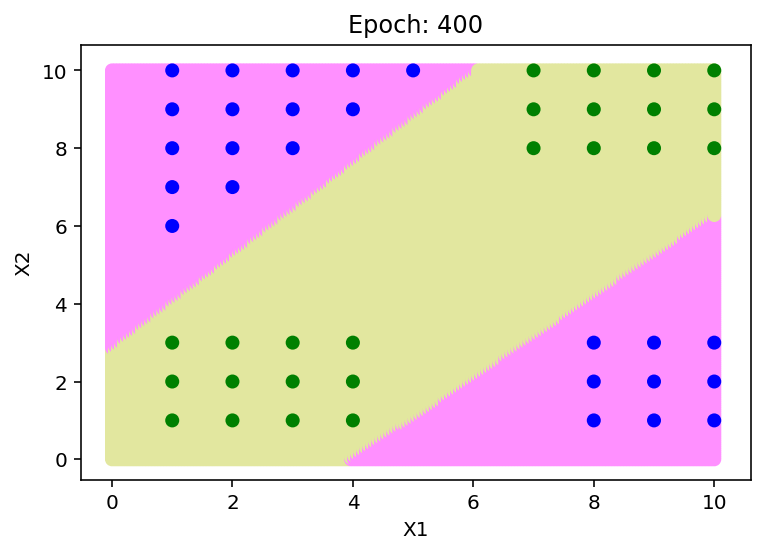

40000


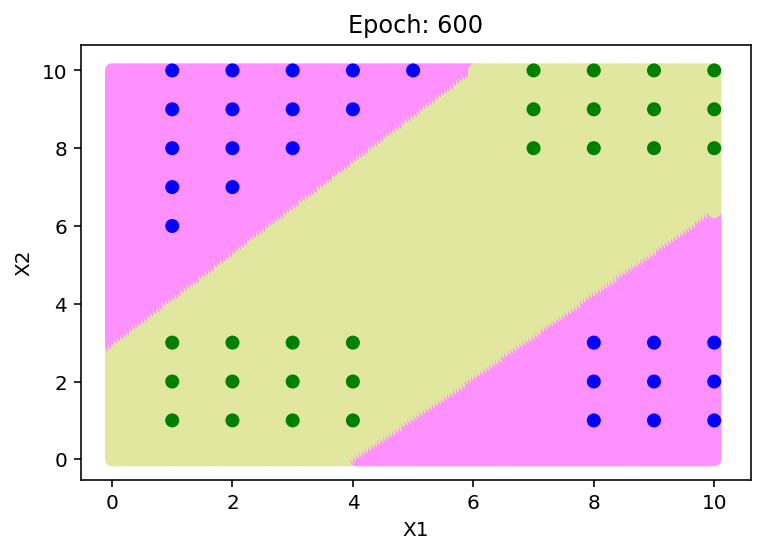

40000


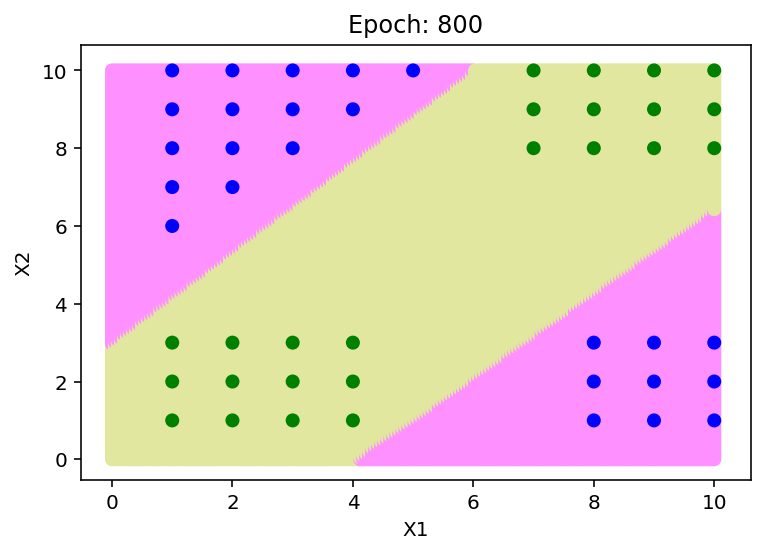

40000


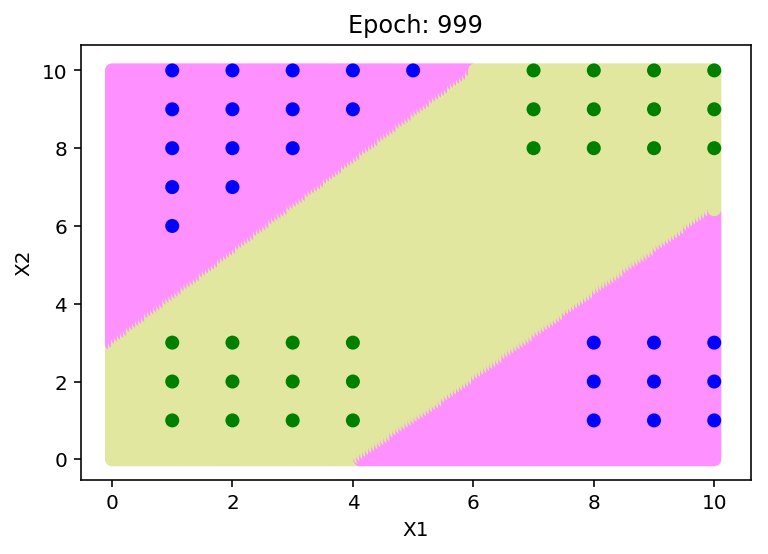

called
40000


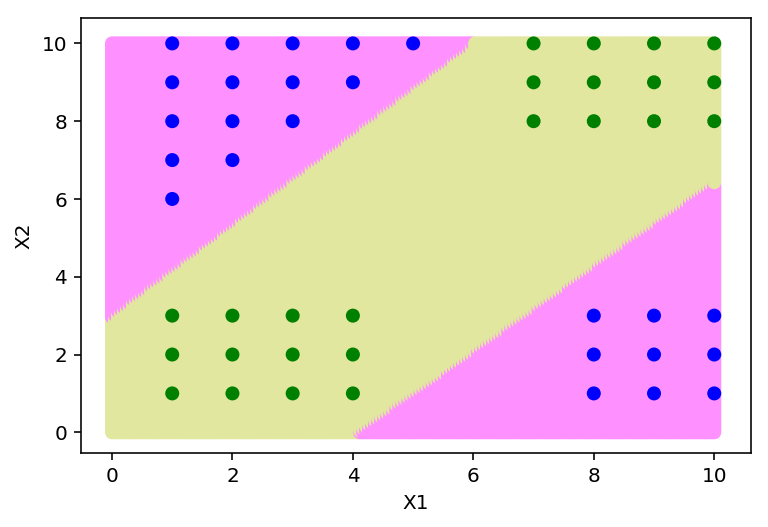

10
[1.12823939e-04 3.62189081e+00 3.85076182e-04 1.86522531e+00
 0.00000000e+00 1.09969224e-01 4.90366533e-05 2.27169967e+00
 6.61472344e+00 1.60181809e+00]


In [6]:
def load_data(file):
    x = []
    y = []
    with open(file) as f:
        for l in f:
            vals = [int(x) for x in l.split()]
            if vals == []:
                break
            x.append([vals[0],vals[1]])
            if vals[2] == 0 or vals[2] == 3:
                y.append([0])
            else:
                y.append([1])
    return x,y

x,y = load_data('data0.txt')
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)

H = 3
print("Underparameterize")
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)
plot_regions(x,y,model)
    

H = 10
print("Overparameterize")

model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())




crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
train(x,y,model,crit)

o = []

def hook(module, input, output):
    print("called")
    o.append(output)
    
model[1].register_forward_hook(hook)


plot_regions(x,y,model)

print(len(o[0].tolist()[0]))
a = np.array(o[0].tolist())
t = np.sum(a, axis=0) / a.shape[0]
print(t)

In [7]:
# Notes

#how many different local optima are found?
#local optima are diff if different classification
# of training data
# decision boundry will be different every time, so it
# is not a  good measure

#also figure out how the weights are spread out
#visualize weights in relation to each other

#4 syntehtic data sets


#NN spread out weights

#look at SGD vs Adam

## 2 Synthetic data set generator

### 2.1 Generate circles and disks

In [8]:
def gen_circle(n, x, y, radius, disk_start=0, circ_start=0, circ_end=1, noise=False):
    """
    Generates points in within a specific disk.
    
    Args:
        - n: Number of points to generate
        - x: X-axis center of circle
        - y: Y-axis center of circle
        - radius:     Radius of circle
        - disk_start: [0, 1] where to start center of circle
        - circ_start: [0, 1] Start place of circle (Defaults 0 == 3PM).
        - circ_end:   [0, 1] End place of circle (Defaults 1 == 3PM, wraps around counter clockwise).
        - noise:      Add standard normal noise to data points
    """
    data = []
    for i in range(n):
        arc = random.uniform(circ_start, circ_end) * 2 * math.pi
        r = radius * np.sqrt(random.uniform(disk_start, 1))
        
        p_x = r * np.cos(arc) + x
        p_y = r * np.sin(arc) + y
        
        if noise:
            p_x += np.random.normal(0,1)
            p_y += np.random.normal(0,1)
            
        data.append([p_x, p_y])
    return data

### 2.2 Visualize two datasets

In [9]:
def plot(data1, data2):
    data1 = np.array(data1)
    data2 = np.array(data2)
    figure(num=None, figsize=(6, 6), dpi=120, facecolor='w', edgecolor='k')
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, aspect='equal')



    axis = { 'xmin' : -10, 
             'xmax' : 10, 
             'ymin' : -10, 
             'ymax' : 10 }

    #ax2.add_artist(Circle((x, y), r, color=(1,0,0,.7)))
    plt.axis(**axis)
    plt.scatter(data1[:, 0], data1[:, 1])
    plt.scatter(data2[:, 0], data2[:, 1])
    plt.show()

## 3 Neural net visualization

### 3.1 Neural net hidden layer weight plot function

In [10]:

def show_weights(model):
    weights1 = np.array(model[0].weight.tolist())
    weights2 = np.array(model[2].weight.tolist())[0]
    print(weights1)
    #bias = np.array(model[-1].bias.tolist())
    
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(weights1[:,0], weights1[:,1], s=300, color='salmon', edgecolor='black', linewidths=2)
    
    m = np.max(np.abs(weights1))
    pad = .1 * m
    plt.xlim(-m - pad, m + pad)
    plt.ylim(-m - pad, m + pad)
    plt.title('Counts of Feature Variable Types')
    plt.xlabel('w1')
    plt.ylabel('w2')

    #plt.savefig('Var-Type-Bar.png')

    plt.show()
    
    plt.title("Model Weights")
    plt.bar(list(range(len(weights2))), weights2)
    plt.show()
    
def show_layer(outputs):
    print(np.shape(outputs))
    plt.bar(list(range(len(outputs))), outputs)
    plt.show()

    
    
def test_set():
    x_points = np.linspace(0,10,200)
    y_points = np.linspace(0,10,200)
    points = [[x,y] for x in x_points for y in y_points]
    return points



def do_all(x,y,H):
    for ind in range(1):
        print('---------------------------------------------------------------')
        model = nn.Sequential(nn.Linear(d,H),
                             nn.ReLU(),
                             nn.Linear(H,1),
                              nn.Sigmoid())

        crit = torch.nn.BCELoss()
        optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
        loss = train(x,y,model,crit)
        print("The loss is " + str(loss.tolist()))

        o = []

        def hook(module, input, output):
            o.append(output)

        model[1].register_forward_hook(hook)

        plot_regions(x,y,model)
        show_weights(model)
        a = np.array(o[0].tolist())
        t = np.sum(a, axis=0) / a.shape[0]




        #plot_regions(x,y,model)
        #show_weights(model)
        show_layer(t)
        print('---------------------------------------------------------------')

## Data set 1

<Figure size 720x720 with 0 Axes>

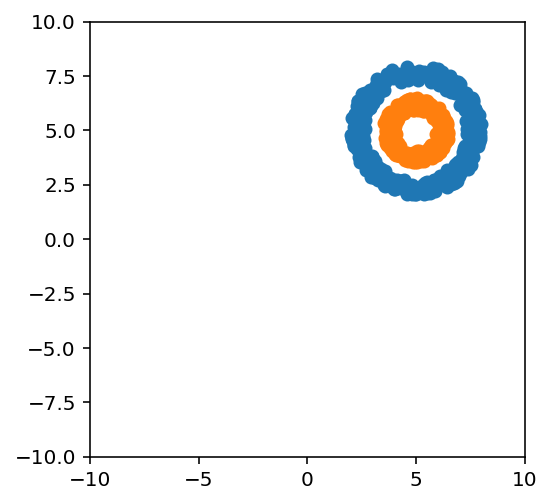

700
700


In [11]:
n = 250
r = 3
x = 5
y = 5

data1 = gen_circle(350, x, y, r, disk_start = .6, circ_start = 0 , circ_end = 1)
data2 = gen_circle(350, x, y, 1.5, disk_start = .4, circ_start = 0 , circ_end = 1)

plot(data1, data2)

x = torch.FloatTensor(data1 + data2)
y = ([[0]] * len(data1)) + ([[1]] * len(data2))
y = torch.FloatTensor(y)
print(len(x))
print(len(y))

40000


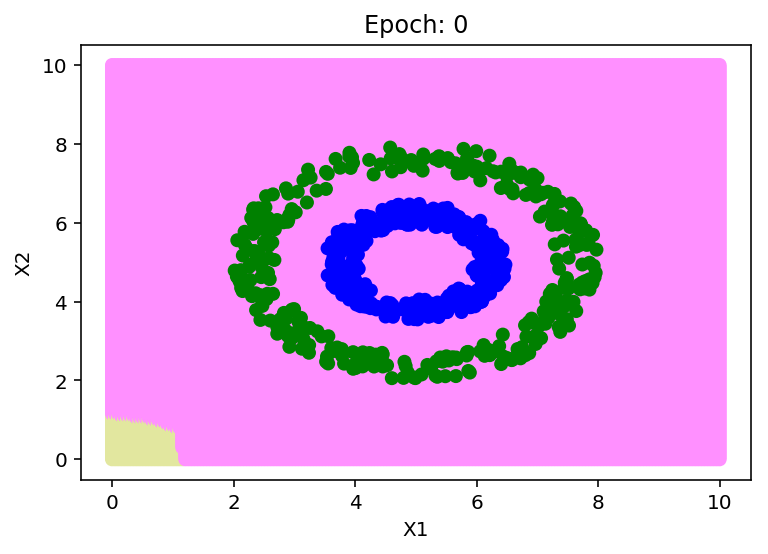

40000


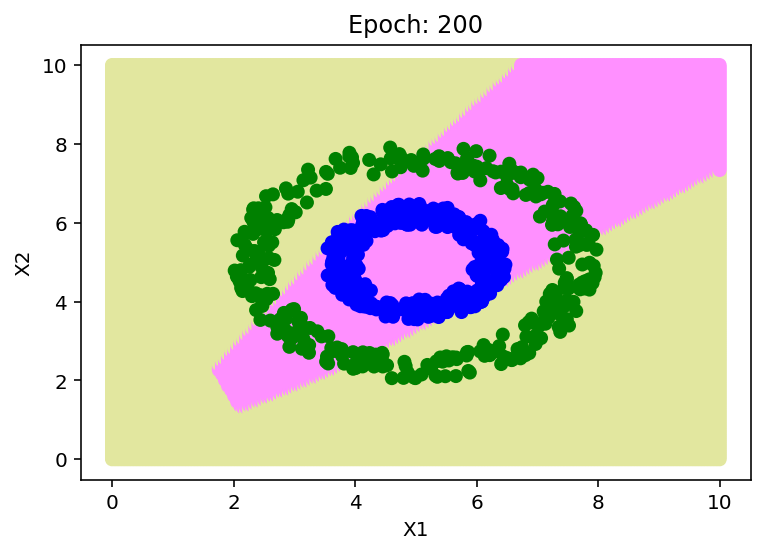

40000


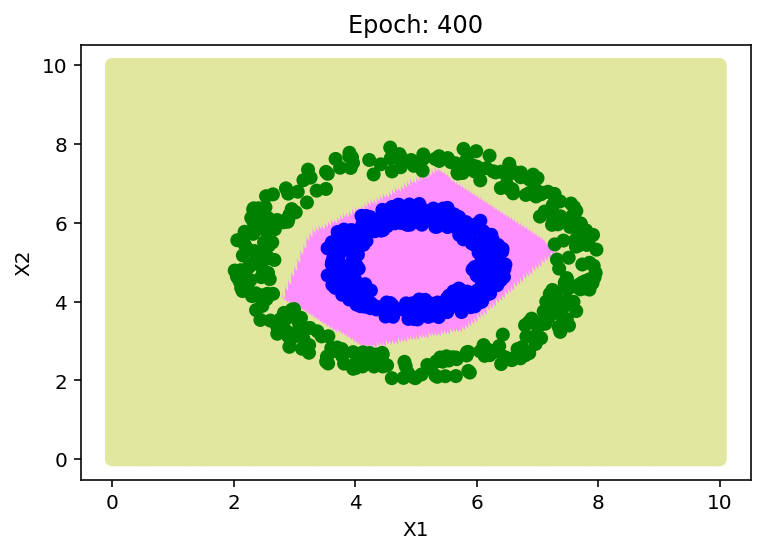

40000


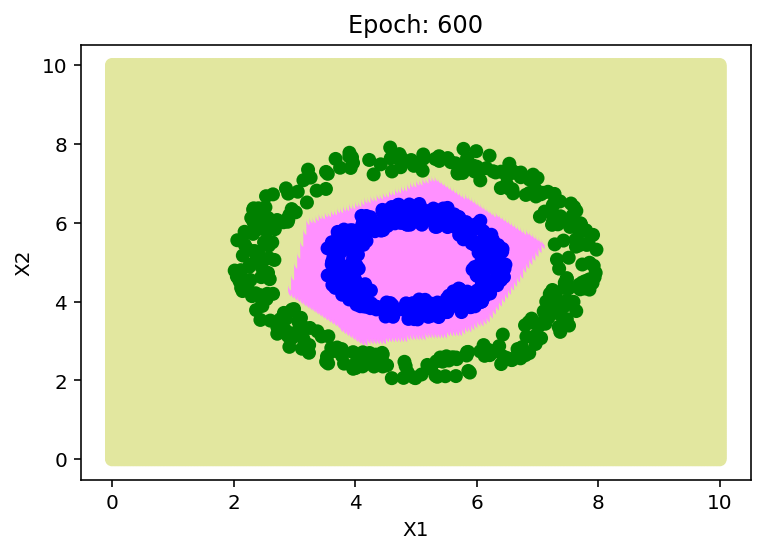

40000


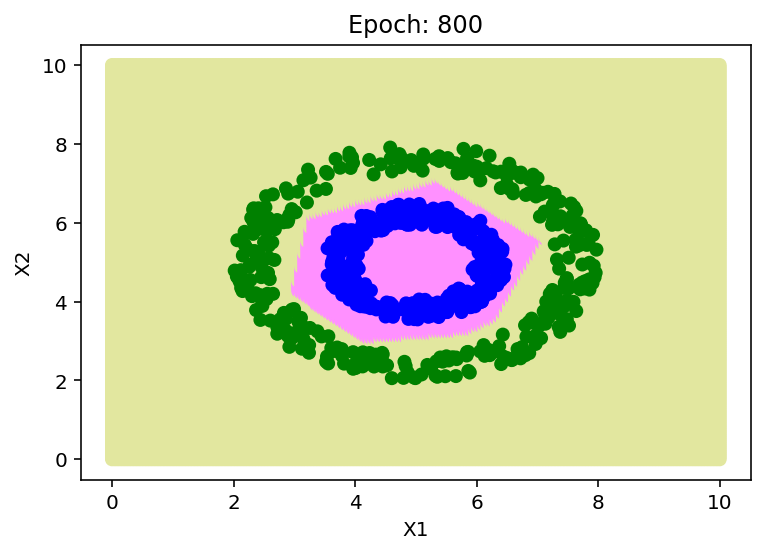

40000


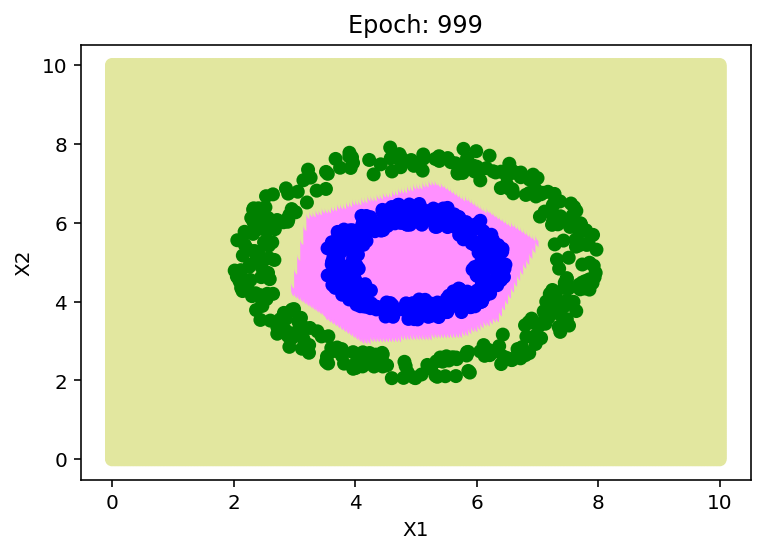

The loss is 0.014025302603840828
40000


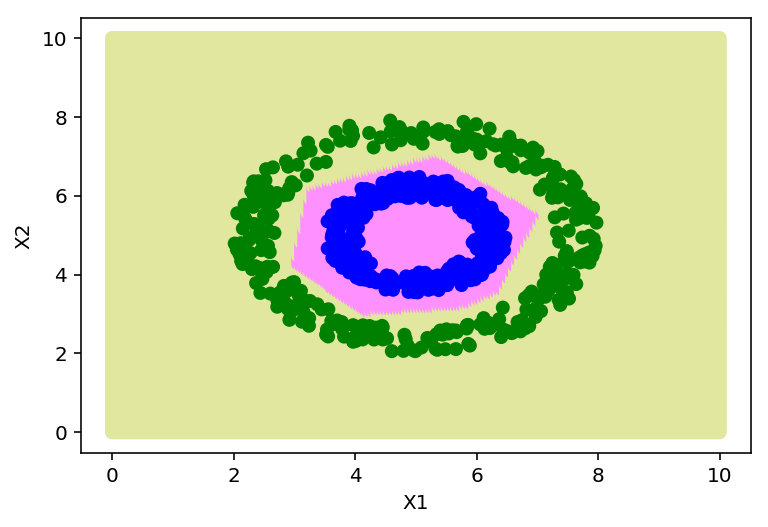

[[-0.40862787  0.00577359]
 [ 2.00519776 -2.29318452]
 [ 0.72434431  1.01089644]
 [-3.05705667  2.59796166]
 [ 0.01295668  0.44449201]
 [-0.85218304 -0.7413159 ]
 [-0.16194946 -0.28104791]
 [-0.05457401 -0.62910223]
 [ 0.18839006 -0.66841239]
 [ 0.83168375  0.98281759]]


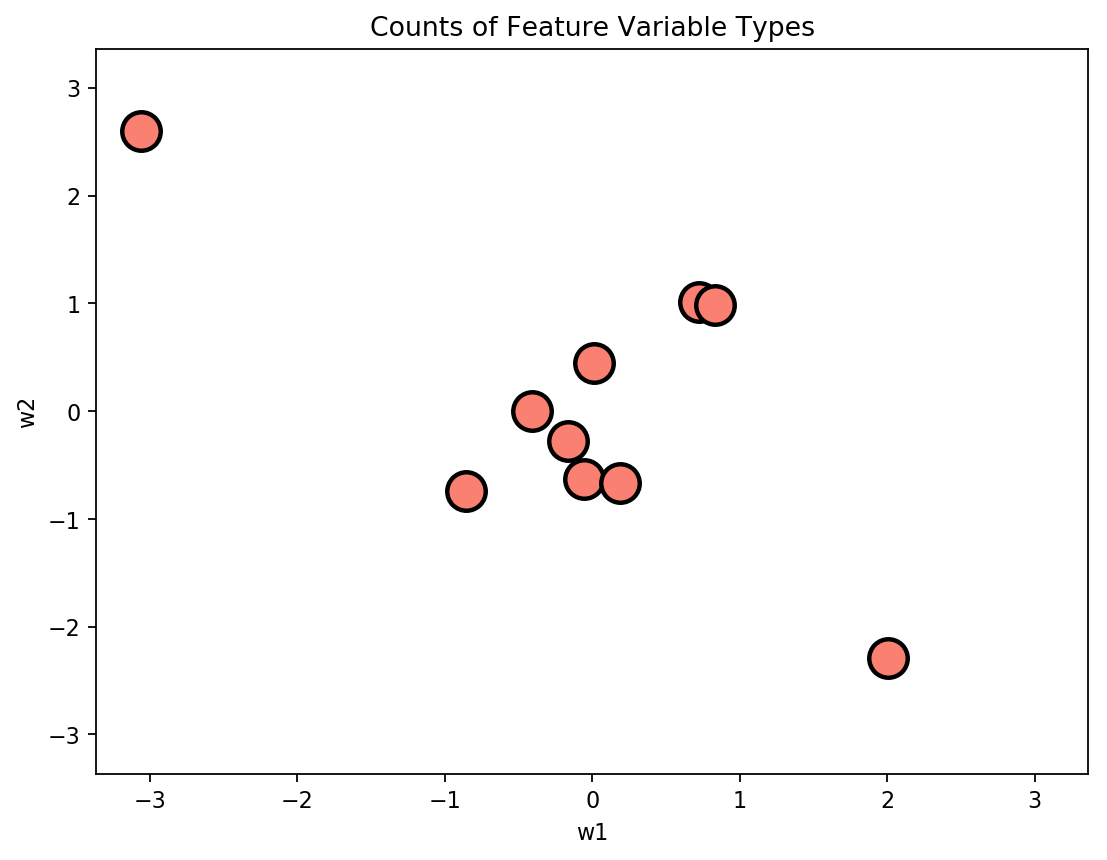

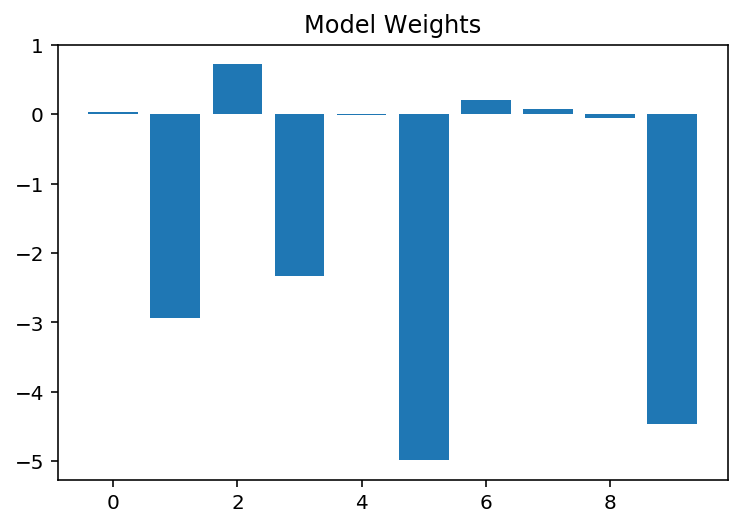

(10,)


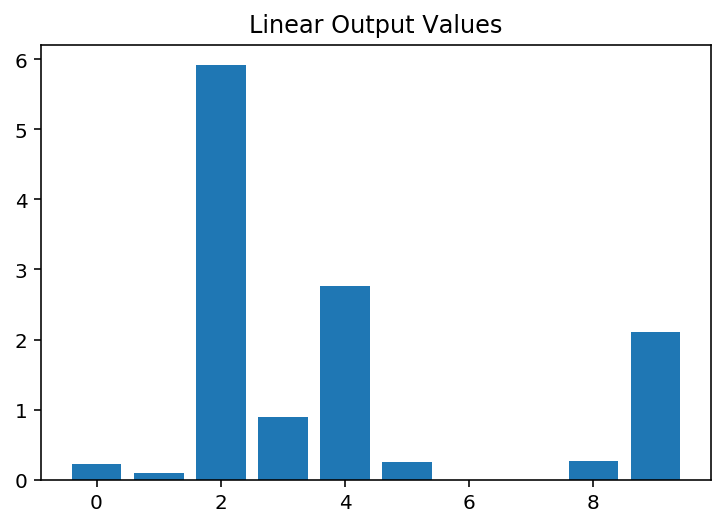

(10,)


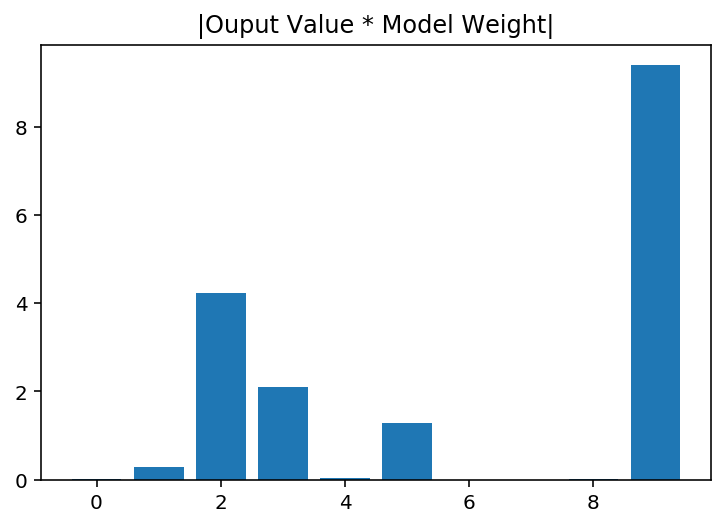

In [12]:
#for ind in range(3):

H = 10
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

o = []

def hook(module, input, output):
    o.append(output)

model[1].register_forward_hook(hook)

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
loss = train(x,y,model,crit)
print("The loss is " + str(loss.tolist()))


plot_regions(x,y,model)

# Print out model weights
show_weights(model)

# Print out the linear output values
a = np.array(o[0].tolist())
t = np.sum(a, axis=0) / a.shape[0]
plt.title("Linear Output Values")
show_layer(t)

# Print out combined plot
weights2 = np.array(model[2].weight.tolist())[0]
combined_plot = np.abs(weights2*t)
plt.title("|Ouput Value * Model Weight|")
show_layer(combined_plot)

## Data set 2

<Figure size 720x720 with 0 Axes>

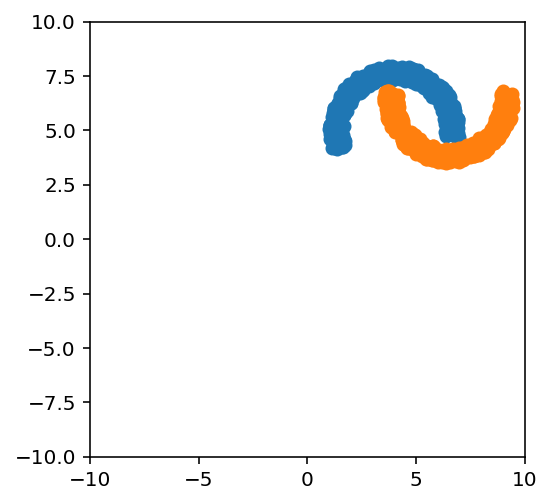

800
800


In [13]:
n = 250
r = 3
x = 5
y = 5

data5 = gen_circle(400, x - 1, y, r, disk_start = .6, circ_start = -.02 , circ_end = .55)
data6 = gen_circle(400, x + 1.5, y + 1.5, r, disk_start = .6, circ_start = .48 , circ_end = 1.02)

plot(data5, data6)

x = torch.FloatTensor(data5 + data6)
y = ([[0]] * len(data5)) + ([[1]] * len(data6))
y = torch.FloatTensor(y)
print(len(x))
print(len(y))

40000


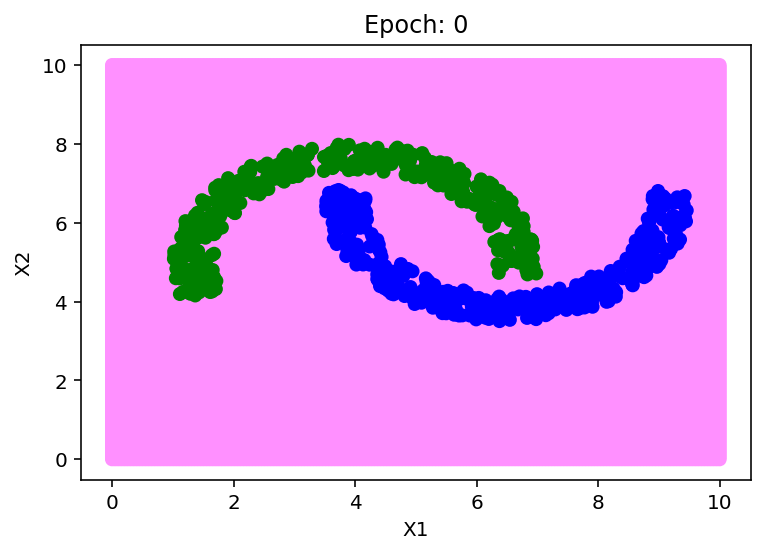

40000


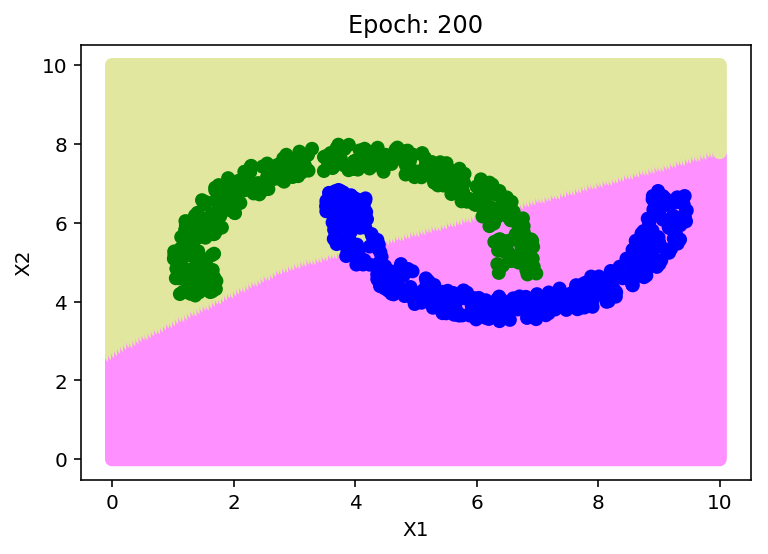

40000


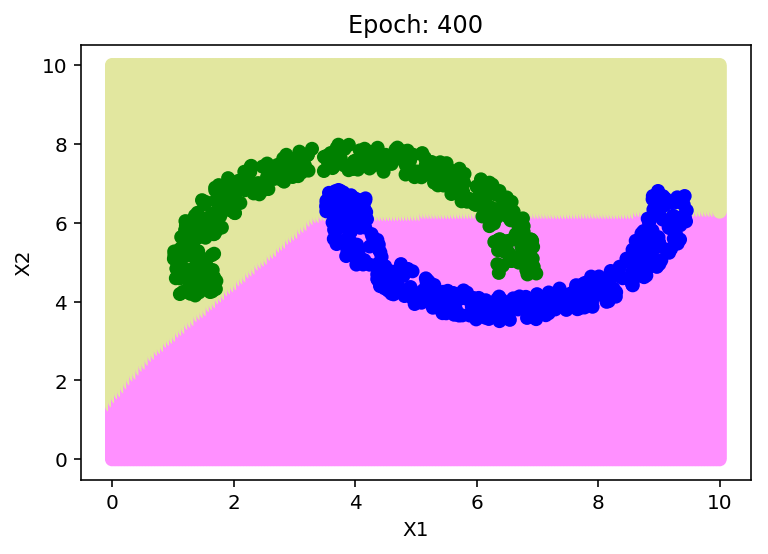

40000


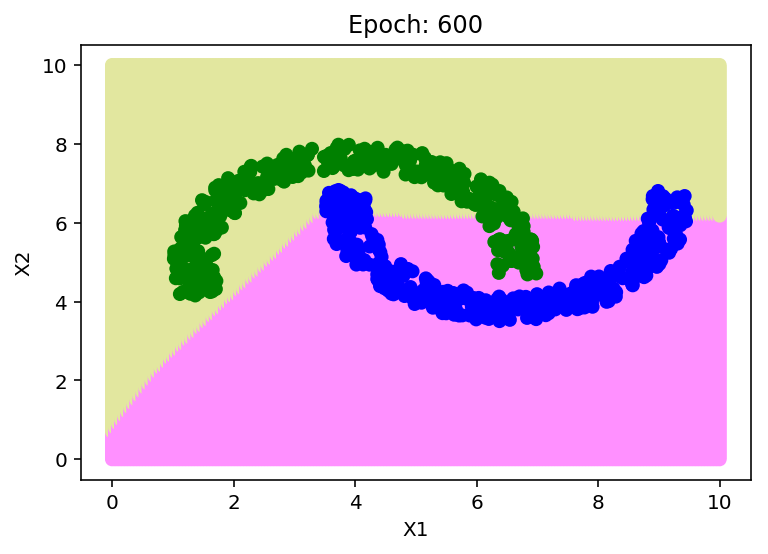

40000


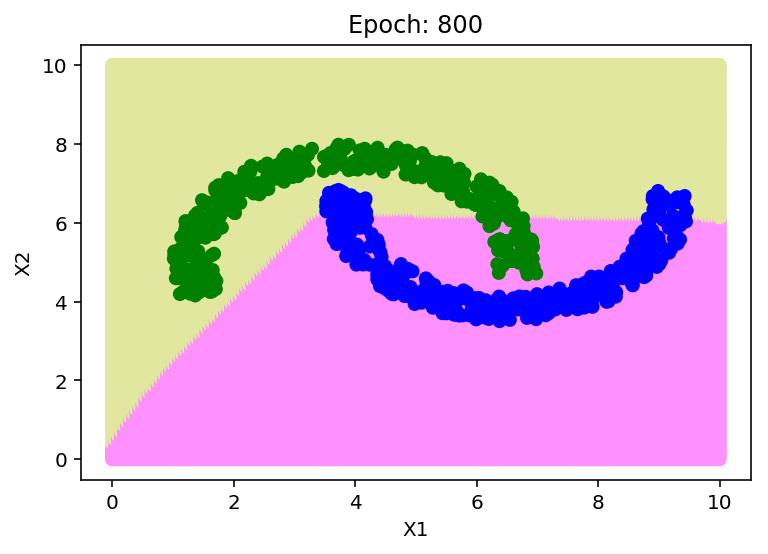

40000


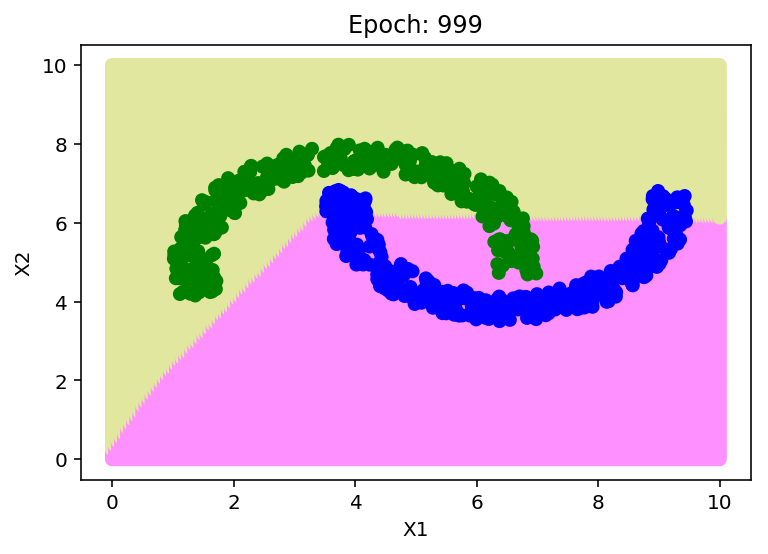

The loss is 0.2859855592250824
[[-0.62505668  0.03408296]
 [-0.67039907 -0.10438538]
 [-0.48089418 -0.63391894]
 [ 0.94778836 -0.1649738 ]
 [-0.55195045 -0.18077838]
 [ 0.007402   -0.48594606]
 [-0.24830572  1.0700984 ]
 [-0.22375533 -0.02425367]
 [-0.21563581  0.85675579]
 [ 0.91678303 -0.46161672]
 [-0.49099991 -0.0369395 ]
 [-0.66067111 -0.19017267]
 [ 1.45992482 -0.24107154]
 [ 0.93802518 -0.31434962]
 [-0.39301139  0.82302761]
 [-0.55806923 -0.26995468]
 [ 0.06728214 -0.41148415]
 [ 0.59478229  0.53588873]
 [-0.19490826 -0.69380331]
 [-0.17525381  0.38447812]
 [-0.51834166 -0.24802744]
 [-0.30446646  0.93915236]
 [ 0.39676228  0.06072247]
 [ 0.23914731 -0.6127888 ]
 [-3.07837319  1.33724117]]


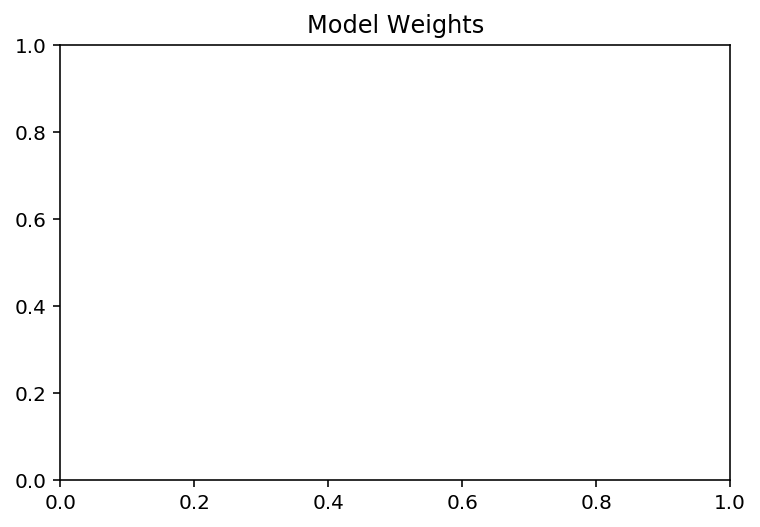

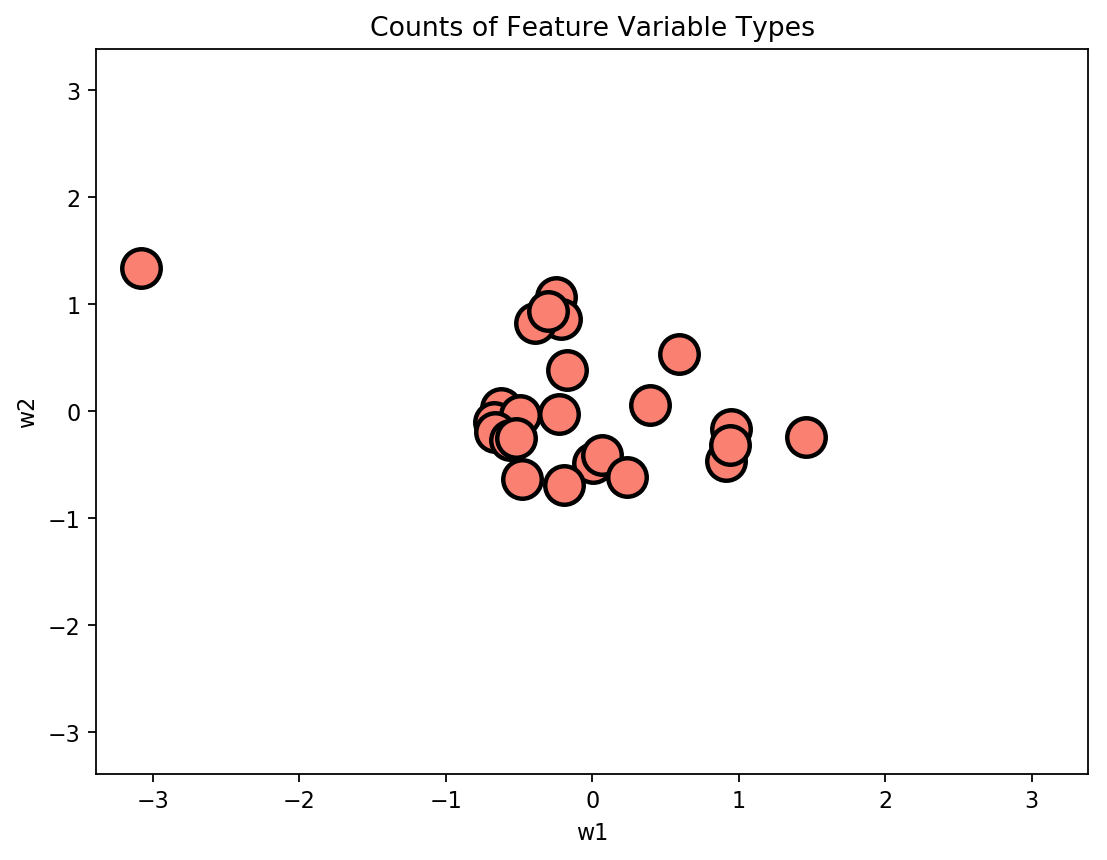

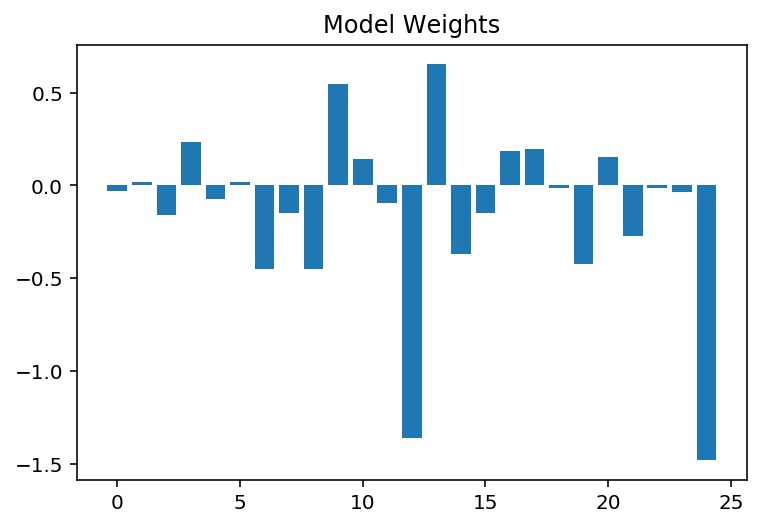

(25,)


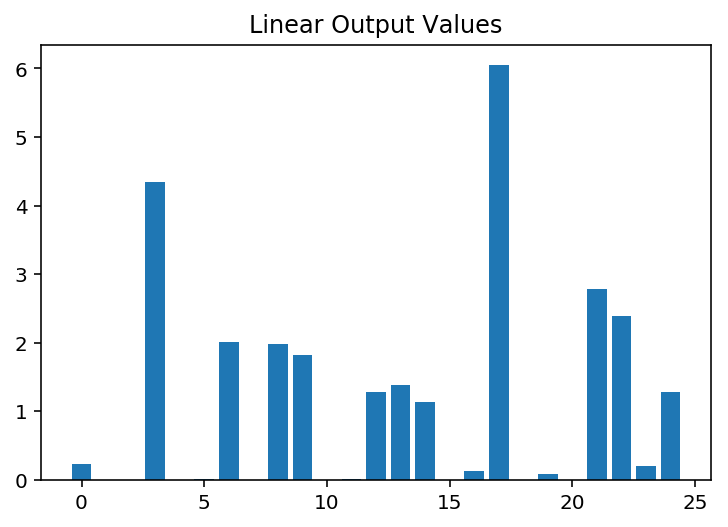

(25,)


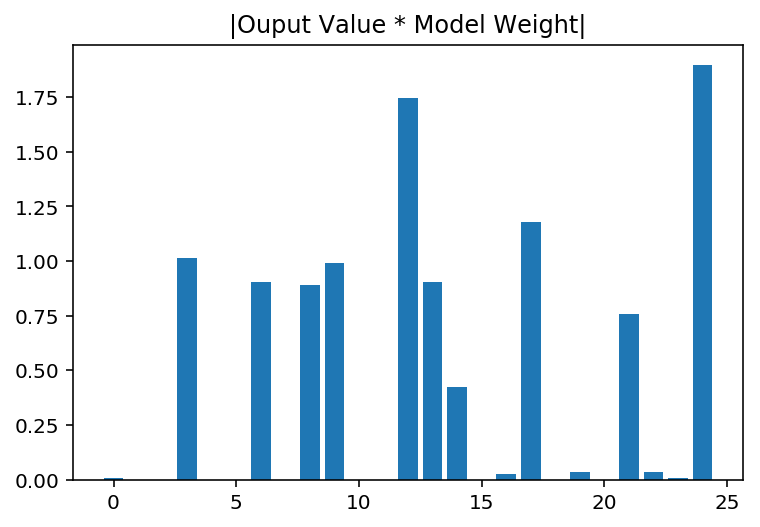

In [14]:
#for ind in range(3):

H = 25
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

o = []

def hook(module, input, output):
    o.append(output)

model[1].register_forward_hook(hook)

crit = torch.nn.BCELoss()
optimizer = torch.2optim.Adam(model.parameters(),lr=0.01)
loss = train(x,y,model,crit)
print("The loss is " + str(loss.tolist()))
    
# Print out model weights
plt.title("Model Weights")
show_weights(model)

# Print out the linear output values
a = np.array(o[0].tolist())
t = np.sum(a, axis=0) / a.shape[0]
plt.title("Linear Output Values")
show_layer(t)

# Print out combined plot
weights2 = np.array(model[2].weight.tolist())[0]
combined_plot = np.abs(weights2*t)
plt.title("|Ouput Value * Model Weight|")
show_layer(combined_plot)

## Data Set 3

---------------------------------------------------------------
40000


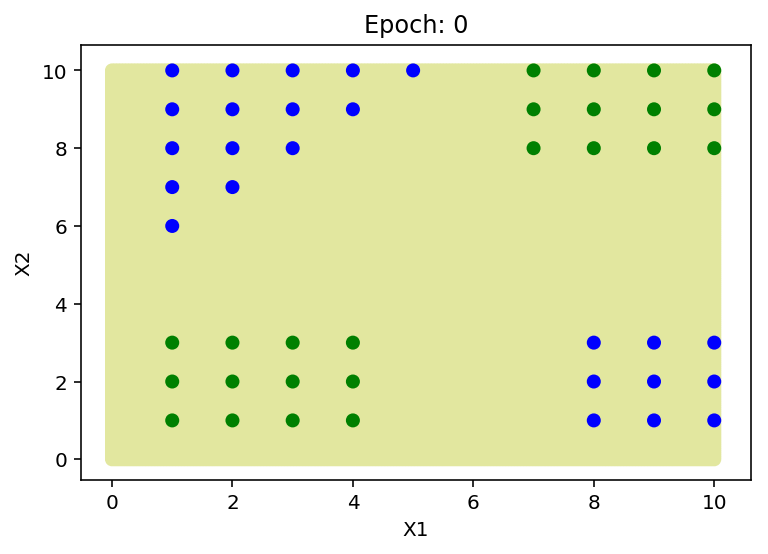

40000


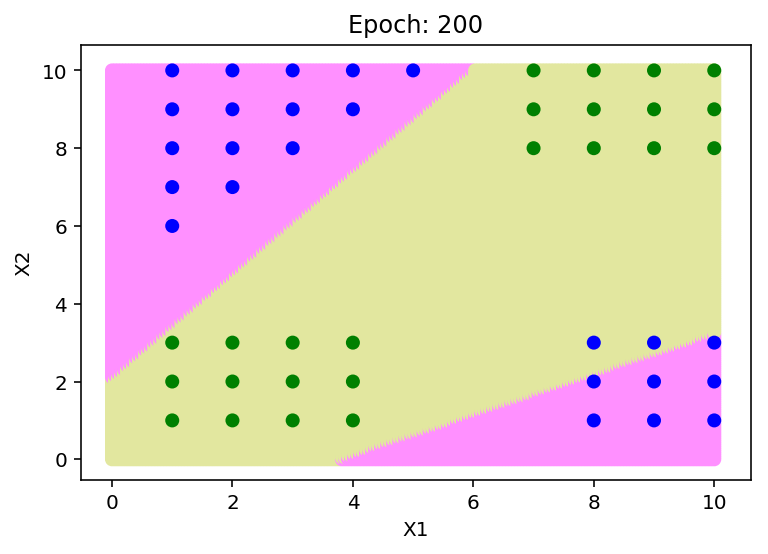

40000


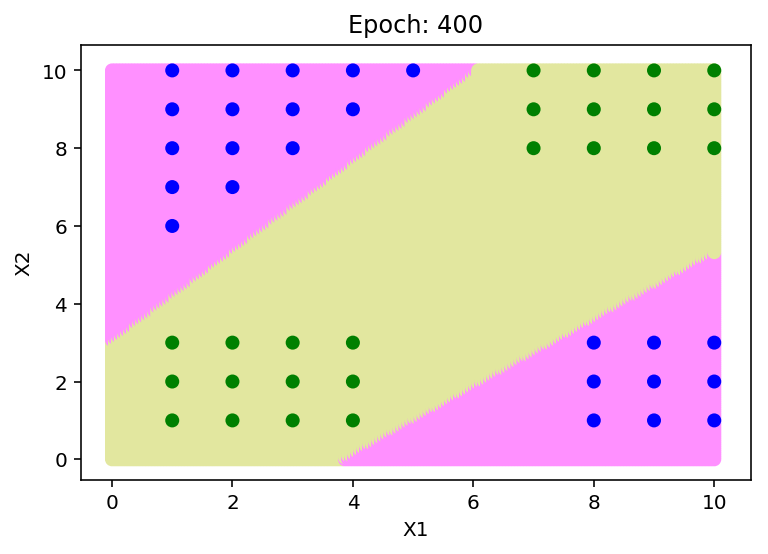

40000


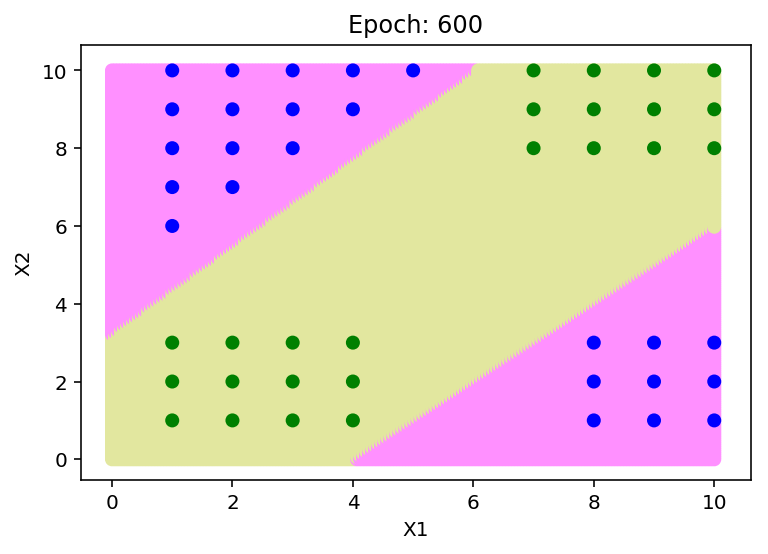

40000


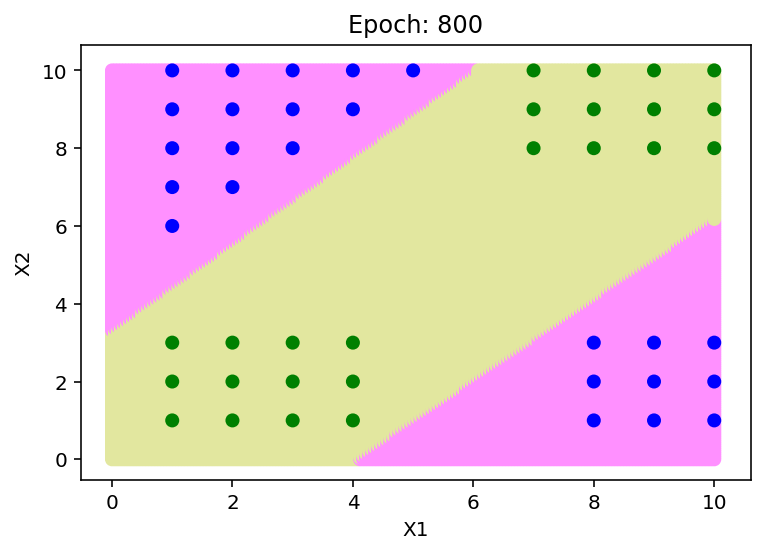

40000


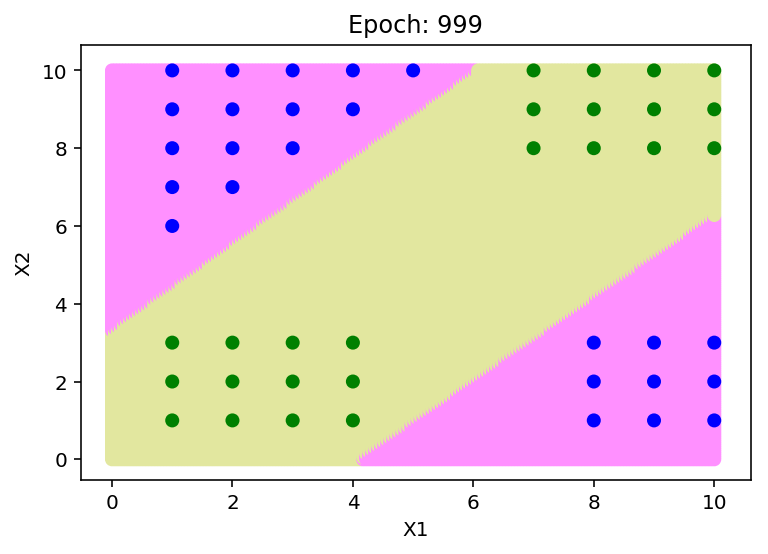

The loss is 0.008581025525927544
[[-0.67428112  0.021726  ]
 [-0.62054253 -0.4443489 ]
 [-0.91829014  0.86182147]
 [-1.91279078  1.98734772]
 [-2.14836073  1.75535274]]


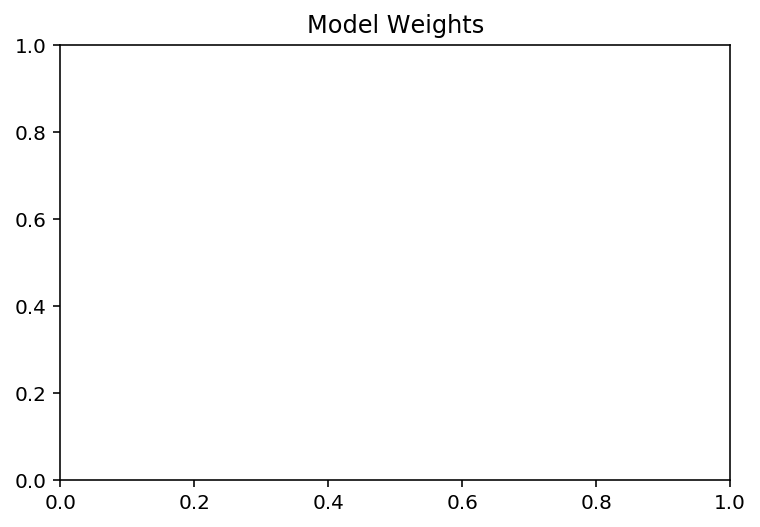

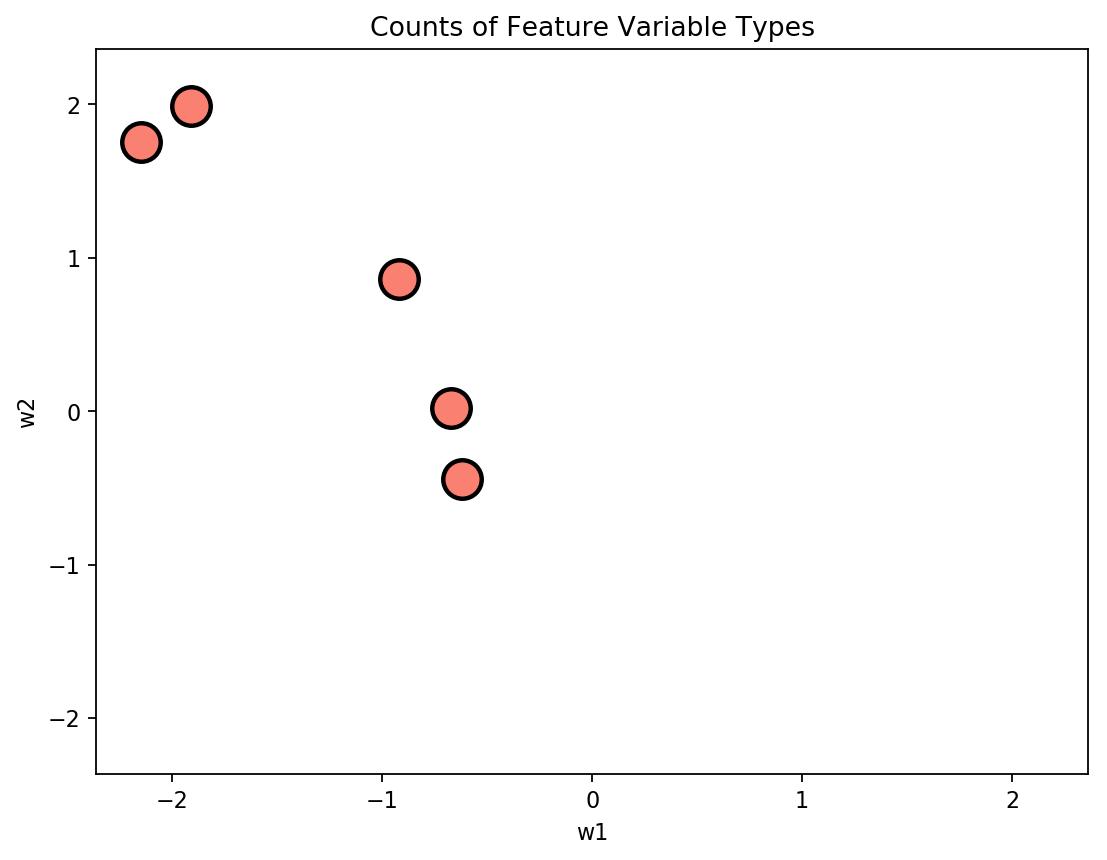

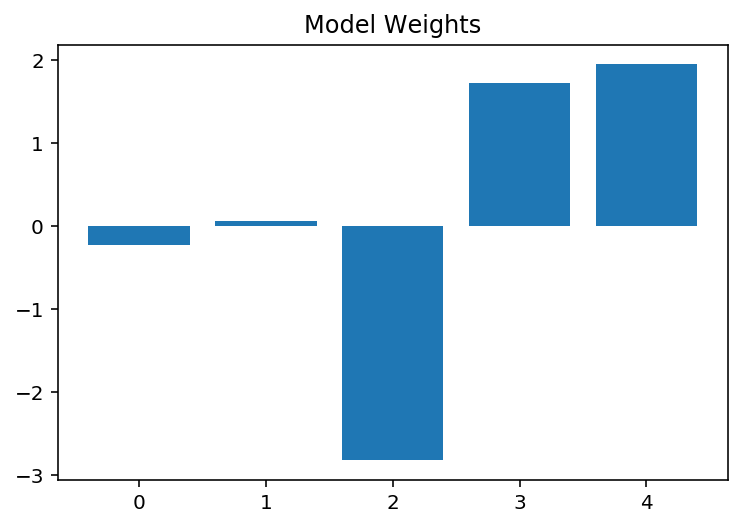

(5,)


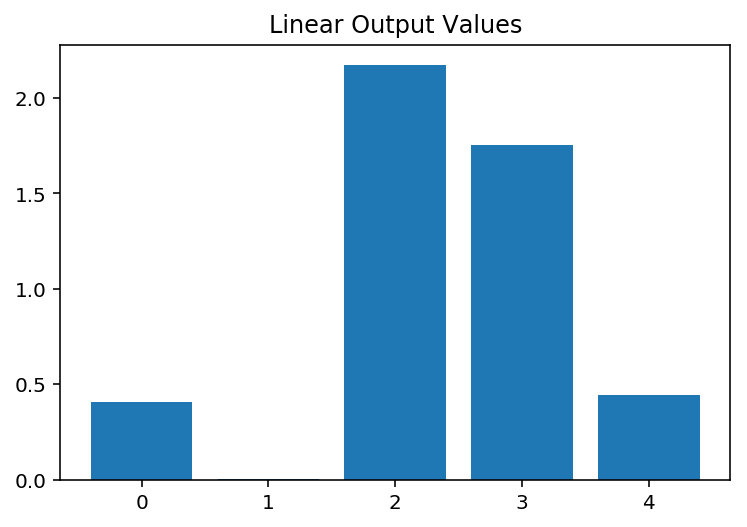

(5,)


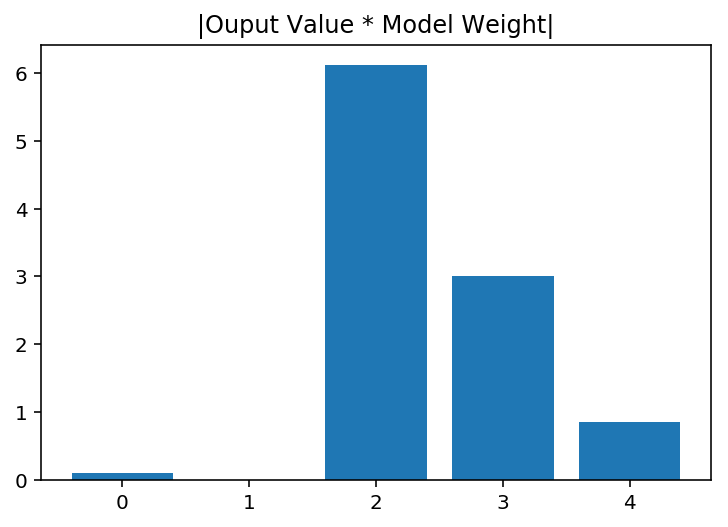

---------------------------------------------------------------


In [15]:

x,y = load_data('data0.txt')
x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
#for ind in range(3):
print('---------------------------------------------------------------')
H = 5
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

o = []

def hook(module, input, output):
    o.append(output)

model[1].register_forward_hook(hook)

crit = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
loss = train(x,y,model,crit)
print("The loss is " + str(loss.tolist()))


# Print out model weights
plt.title("Model Weights")
show_weights(model)

# Print out the linear output values
a = np.array(o[0].tolist())
t = np.sum(a, axis=0) / a.shape[0]
plt.title("Linear Output Values")
show_layer(t)

# Print out combined plot
weights2 = np.array(model[2].weight.tolist())[0]
combined_plot = np.abs(weights2*t)
plt.title("|Ouput Value * Model Weight|")
show_layer(combined_plot)
print('---------------------------------------------------------------')

## Data Set 4

40000


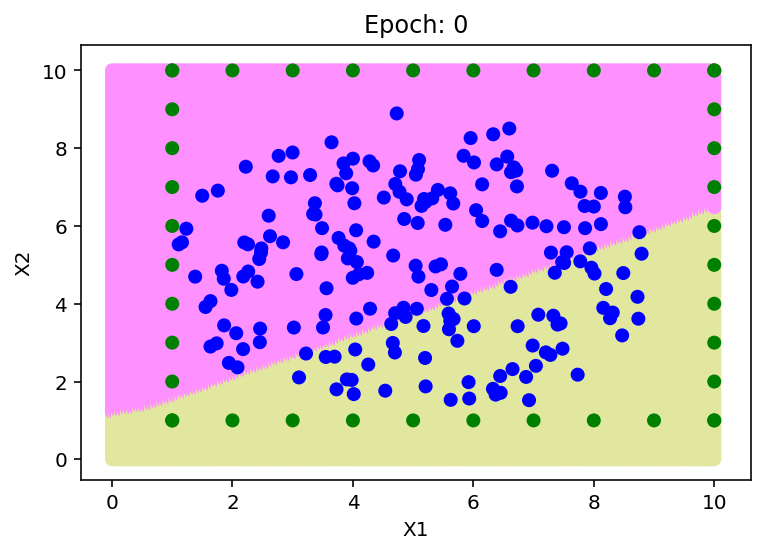

40000


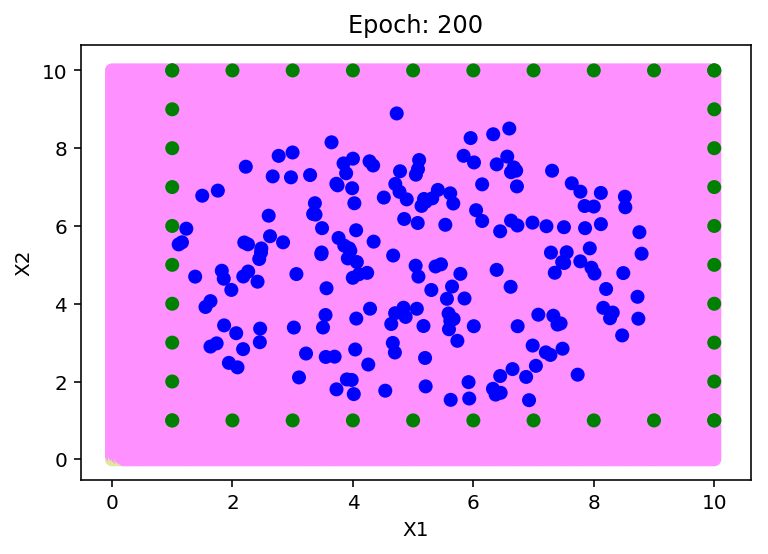

40000


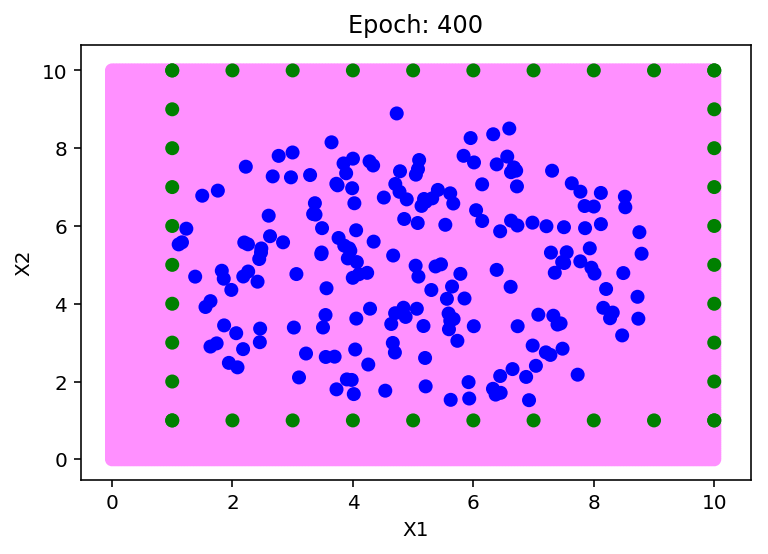

40000


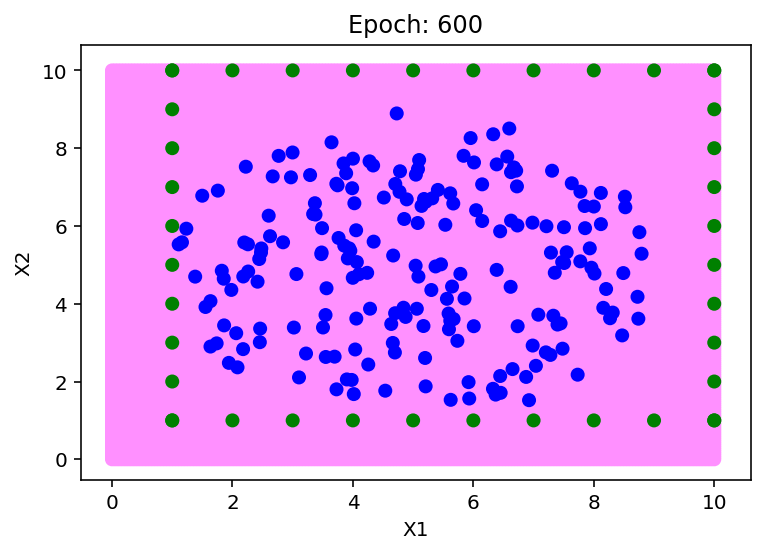

40000


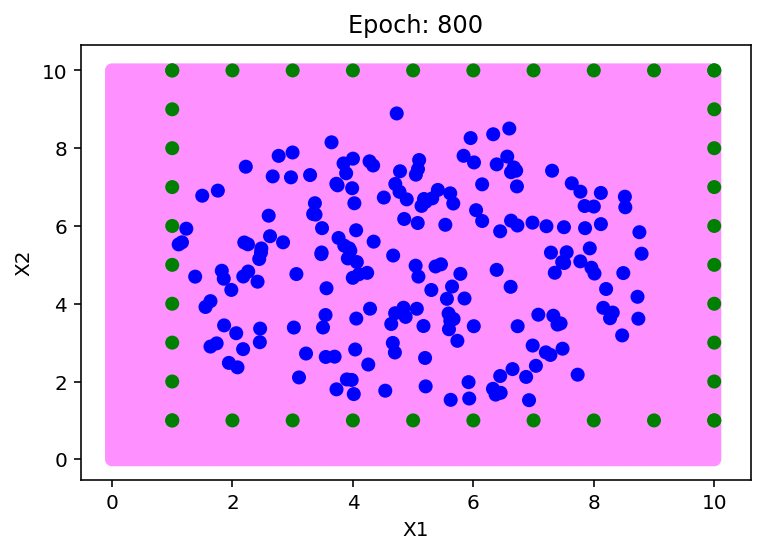

40000


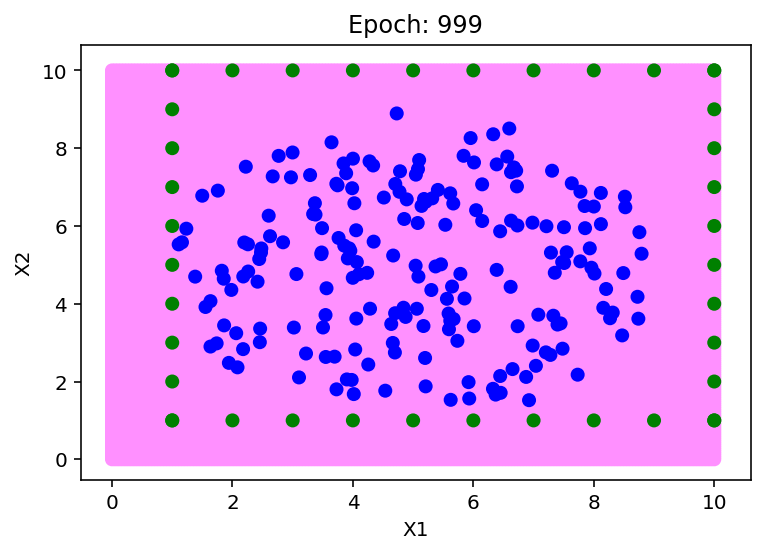

The loss is 0.4751209020614624
[[ 0.15091997  0.44703594]
 [ 0.30364522  0.34175718]
 [ 0.57180977  0.28530407]
 [-0.33165842 -0.45258778]
 [-0.48980403 -0.11073333]]


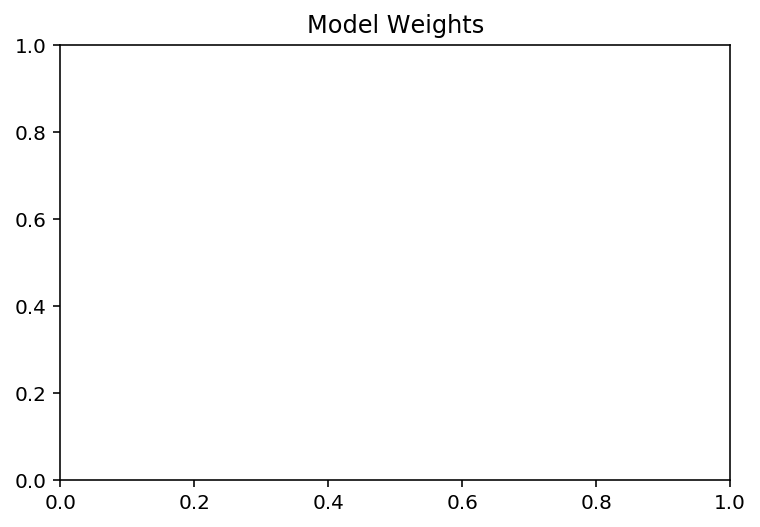

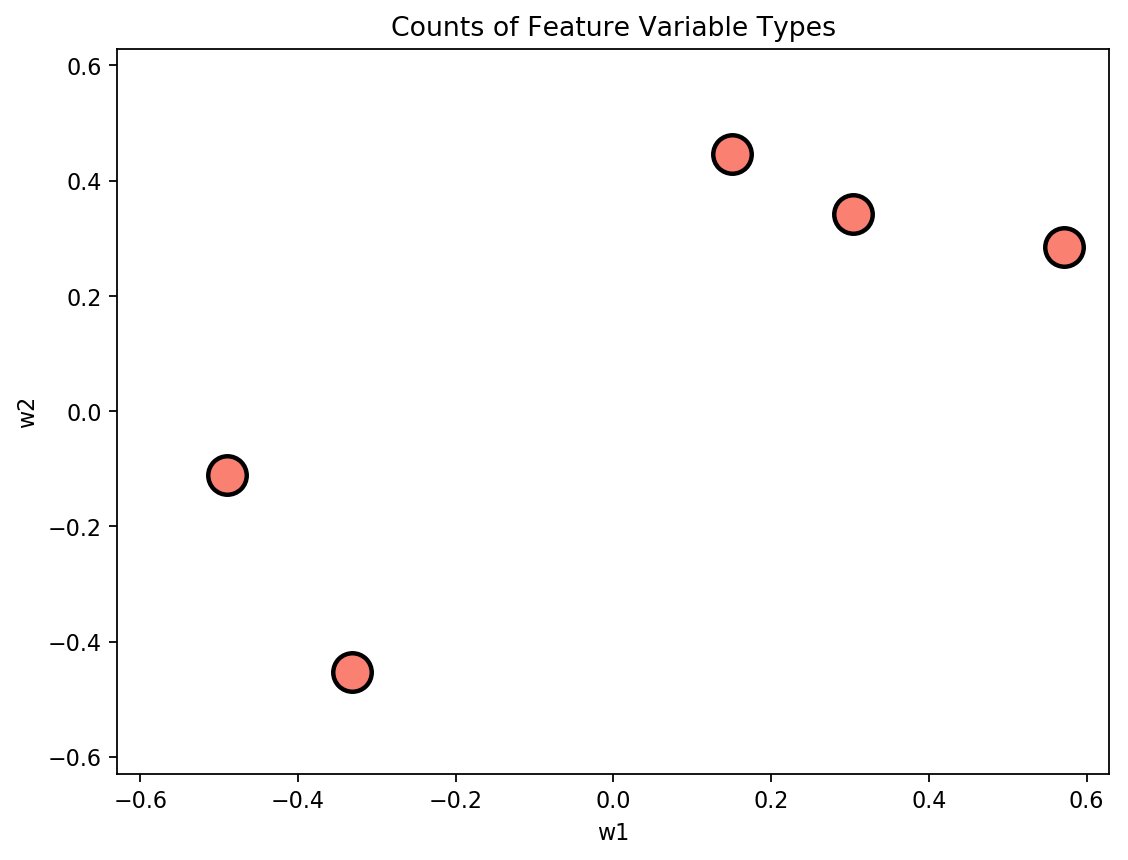

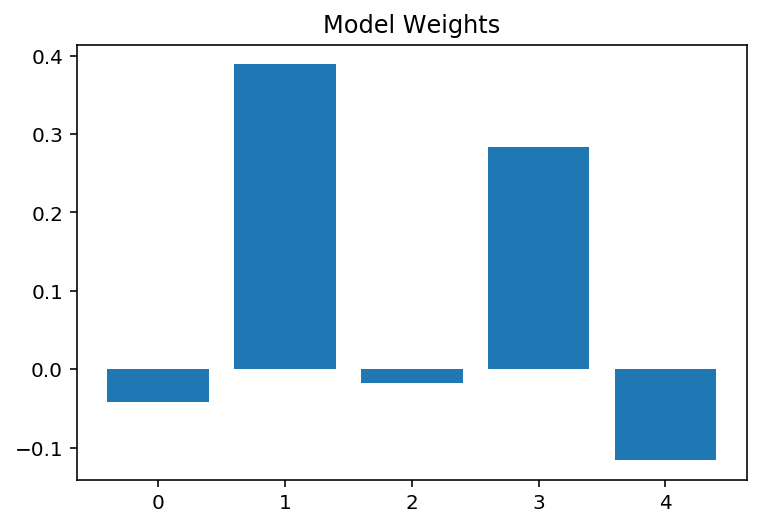

(5,)


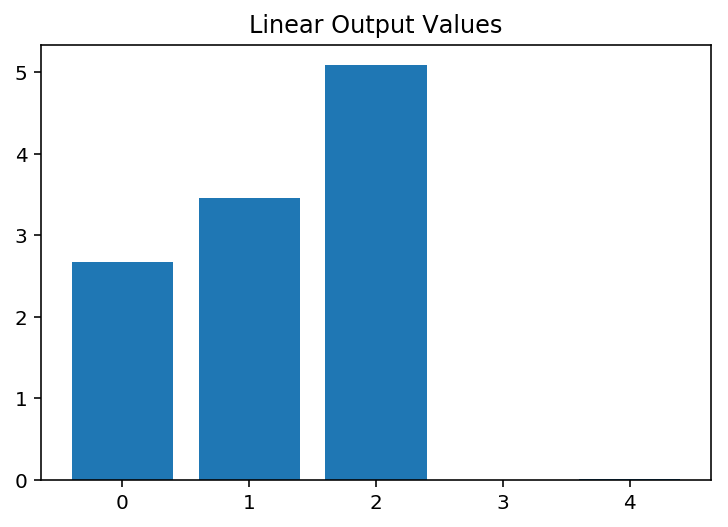

(5,)


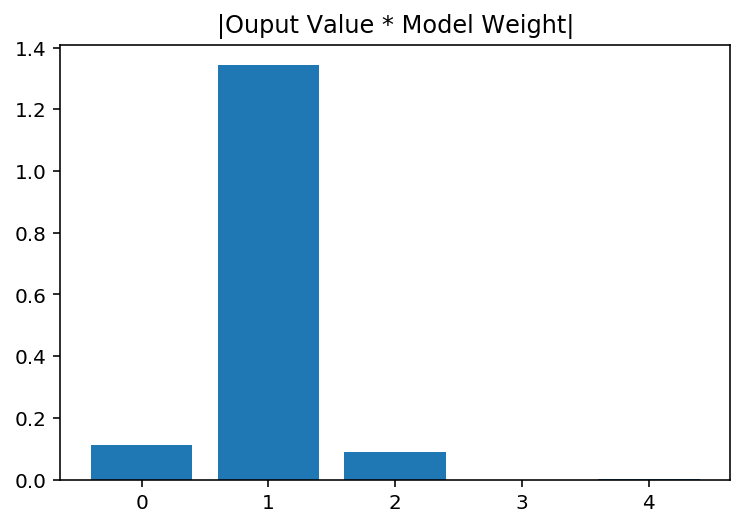

---------------------------------------------------------------


In [16]:
#get data for new model
x1 = []
for z in range(1,11):
    x1.append([z,1])
    x1.append((1,z))
    x1.append((10,z))
    x1.append((z,10))
y1 = [[0] for x in range(len(x1))]
x2 = []
y2 = []
for z in range(200):
    r = 4 * (random.random() ** 0.5)
    theta = random.random() * 2 * 3.14159
    x = 5 + r * cos(theta)
    y = 5 + r * sin(theta)
    x2.append([x,y])
    y2.append([1])

x = x1 + x2
y = y1 + y2





x = torch.FloatTensor(x)
y = torch.FloatTensor(y)
#for ind in range(3):

H = 5
model = nn.Sequential(nn.Linear(d,H),
                     nn.ReLU(),
                     nn.Linear(H,1),
                      nn.Sigmoid())

o = []

def hook(module, input, output):
    o.append(output)

model[1].register_forward_hook(hook)

crit = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
loss = train(x,y,model,crit)
print("The loss is " + str(loss.tolist()))

    
# Print out model weights
plt.title("Model Weights")
show_weights(model)

# Print out the linear output values
a = np.array(o[0].tolist())
t = np.sum(a, axis=0) / a.shape[0]
plt.title("Linear Output Values")
show_layer(t)

# Print out combined plot
weights2 = np.array(model[2].weight.tolist())[0]
combined_plot = np.abs(weights2*t)
plt.title("|Ouput Value * Model Weight|")
show_layer(combined_plot)    
print('---------------------------------------------------------------')    

In [ ]:
#another 3 data sets
#write update rules for gradient descent
#generate outputVal * modelWeight graphs during training to see how they change
#when do the neural networks actually decide weights?
#use SGD when doing update rules
#write findings about initialization and patterns in training

#data sets: binary data sets with lots of clusters(a bunch of clusters on the edge of a circle, should need K boundries)
#number of clusters is variable(how many hidden units needed for k clusters?)
#how do hidden units scale with number of clusters